In [1]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight') 
%matplotlib inline
!pip install pycaret
from pycaret.regression import *


import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

  Using cached pycaret-2.3.5-py3-none-any.whl (288 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached lightgbm-3.3.2-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)
     |████████████████████████████████| 29.1 MB 5.8 MB/s eta 0:00:01
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python /private/var/folders/sk/r8f55h391r31p2z7cmkwx22w0000gn/T/pip-standalone-pip-w531gfvm/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/sk/r8f55h391r31p2z7cmkwx22w0000gn/T/pip-build-env-51lnne7p/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implemen

  Using cached pycaret-2.3.3-py3-none-any.whl (264 kB)
  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached pycaret-2.3.1-py3-none-any.whl (261 kB)
  Using cached pycaret-2.3.0-py3-none-any.whl (261 kB)
  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached pycaret-2.2.3-py3-none-any.whl (249 kB)
  Using cached spacy-3.2.1-cp39-cp39-macosx_10_9_x86_64.whl (6.3 MB)
  Using cached pycaret-2.2.2-py3-none-any.whl (249 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached mlflow-1.22.0-py3-none-any.whl (15.5 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached pyod-0.9.7-py3-none-any.whl
  Using cached catboost-1.0.3-cp39-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (12.9 MB)
  Using cached ge

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached pyLDAvis-3.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached pyLDAvis-3.2.2-py2.py3-none-any.whl
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/sk/r8f55h391r31p2z7cmkwx22w0000gn/T/pip-install-nm0i9v2g/wordcloud_d0fc40713e5a4f628516a712d0558198/setup.py'"'"'; __file__='"'"'/private/var/folders/sk/r8f55h391r31p2z7cmkwx22w0000gn/T/pip-install-nm0i9v2g/wordcloud_d0fc40713e5a4f628516a712d0558198/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'

ModuleNotFoundError: No module named 'pycaret'

In [2]:
dataset=pd.read_csv('./Latest Covid-19 India Status.csv')
dataset

FileNotFoundError: [Errno 2] No such file or directory: './Latest Covid-19 India Status.csv'

In [ ]:
dataset.shape

In [4]:
dataset.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [5]:
dataset.nunique()

State/UTs          36
Total Cases        36
Active             34
Discharged         36
Deaths             36
Active Ratio       27
Discharge Ratio    33
Death Ratio        30
Population         36
dtype: int64

In [52]:
dataset.describe()

Total Cases        Active    Discharged         Deaths  Active Ratio  \
count  3.600000e+01     36.000000  3.600000e+01      36.000000     36.000000   
mean   9.620349e+05   2754.305556  9.461326e+05   13147.944444      0.304444   
std    1.443505e+06   7631.311349  1.415587e+06   24626.102400      0.487216   
min    7.688000e+03      0.000000  7.553000e+03       4.000000      0.000000   
25%    8.478325e+04    123.500000  8.366600e+04     823.750000      0.037500   
50%    4.763840e+05    310.000000  4.652785e+05    5628.500000      0.135000   
75%    1.017722e+06   2156.500000  1.004632e+06   13806.750000      0.360000   
max    6.638071e+06  44427.000000  6.486105e+06  141163.000000      2.610000   

       Discharge Ratio  Death Ratio    Population  
count        36.000000    36.000000  3.600000e+01  
mean         98.403611     1.291667  3.971861e+07  
std           0.622668     0.563963  5.050913e+07  
min          97.020000     0.040000  6.600100e+04  
25%          98.060000     0.962500  1.695473e+06  
50%          98.355000     1.315000  2.410088e+07  
75%          98.687500     1.665000  6.979986e+07  
max          99.960000     2.750000  2.315026e+08

In [53]:
#cleaning the data
#to check whether null values are present
dataset.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [54]:
#relationship analysis
#correlation analysis
cor = dataset.corr()
cor

Total Cases    Active  Discharged    Deaths  Active Ratio  \
Total Cases         1.000000  0.714638    0.999987  0.912915     -0.027167   
Active              0.714638  1.000000    0.715662  0.441405      0.251163   
Discharged          0.999987  0.715662    1.000000  0.911143     -0.027517   
Deaths              0.912915  0.441405    0.911143  1.000000     -0.088525   
Active Ratio       -0.027167  0.251163   -0.027517 -0.088525      1.000000   
Discharge Ratio    -0.061655 -0.072334   -0.059453 -0.174109     -0.505258   
Death Ratio         0.092325 -0.136432    0.090197  0.269278     -0.306817   
Population          0.524886  0.117705    0.526066  0.490717     -0.242596   

                 Discharge Ratio  Death Ratio  Population  
Total Cases            -0.061655     0.092325    0.524886  
Active                 -0.072334    -0.136432    0.117705  
Discharged             -0.059453     0.090197    0.526066  
Deaths                 -0.174109     0.269278    0.490717  
Active Ratio           -0.505258    -0.306817   -0.242596  
Discharge Ratio         1.000000    -0.666304    0.123068  
Death Ratio            -0.666304     1.000000    0.073378  
Population              0.123068     0.073378    1.000000

<AxesSubplot:>

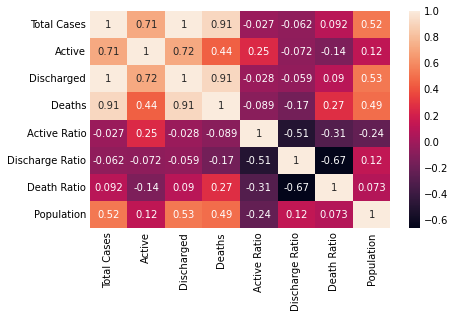

In [55]:
#plotting the correlation in graph
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)

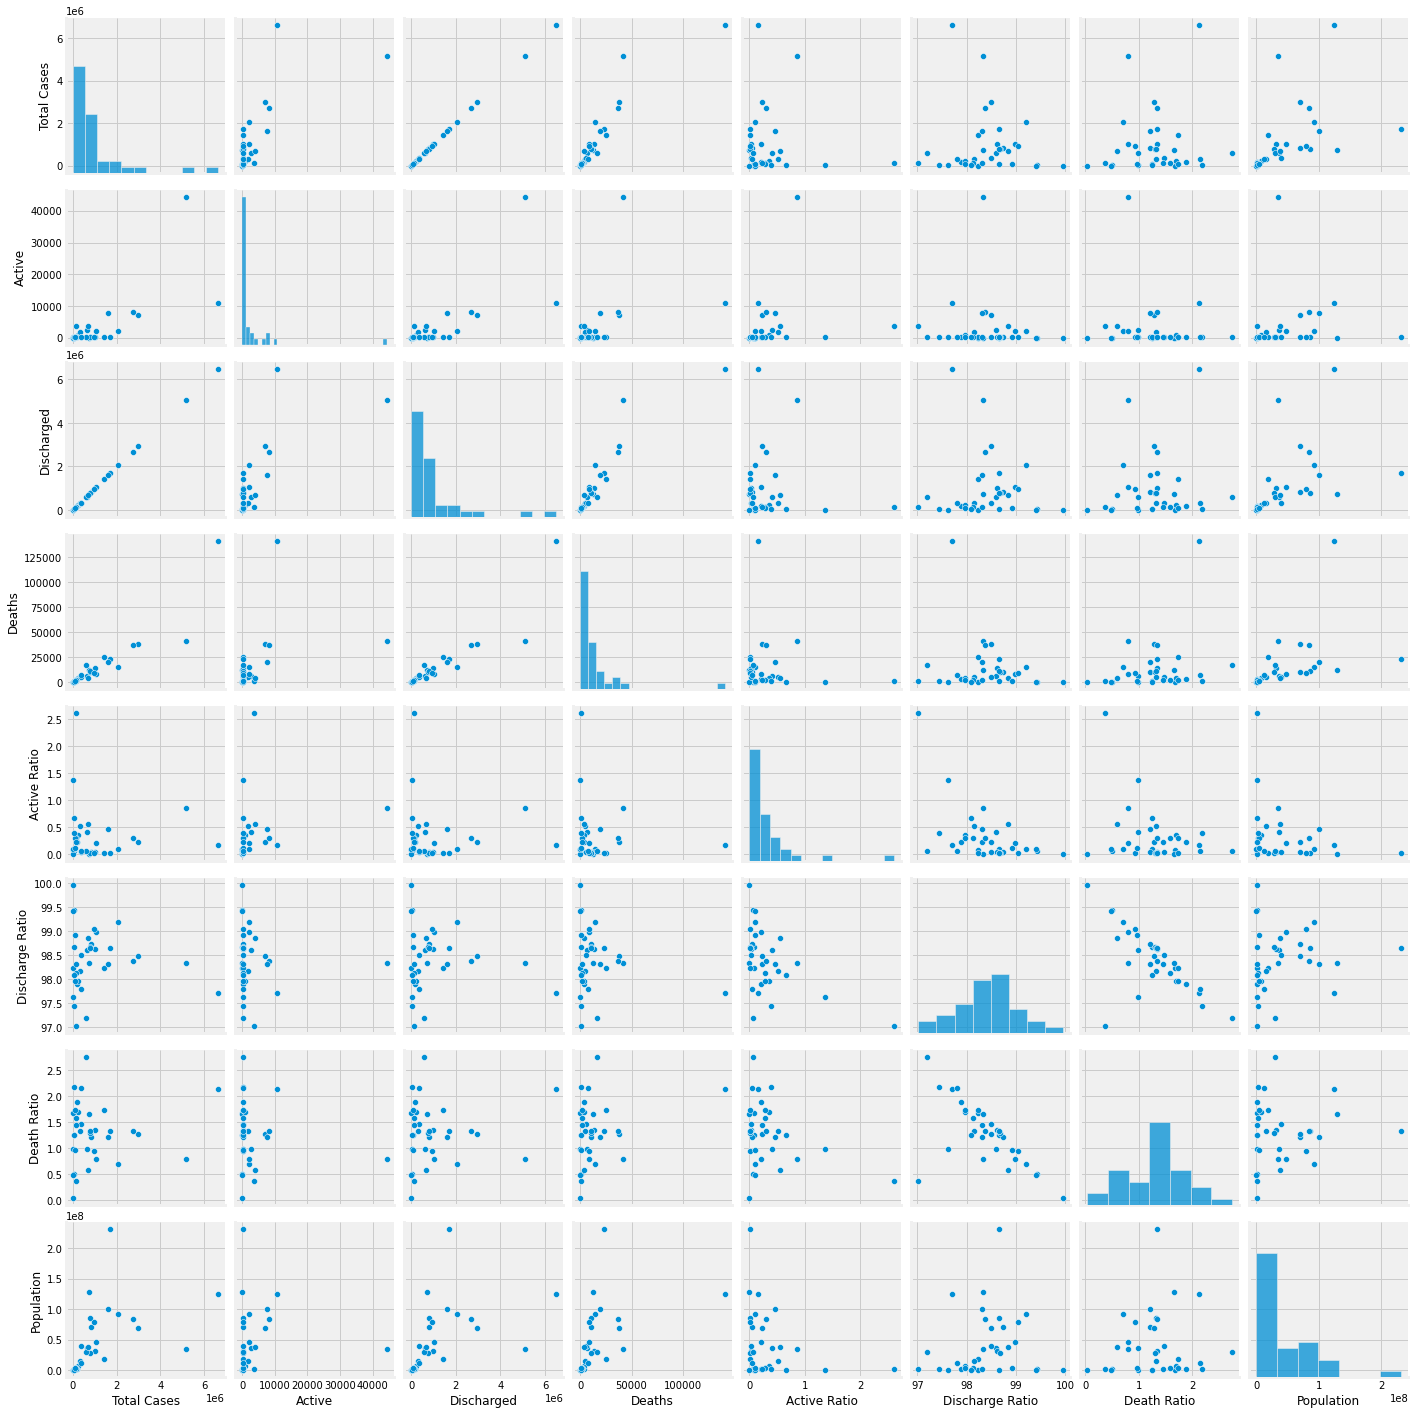

In [56]:
#visualization
sns.pairplot(dataset)

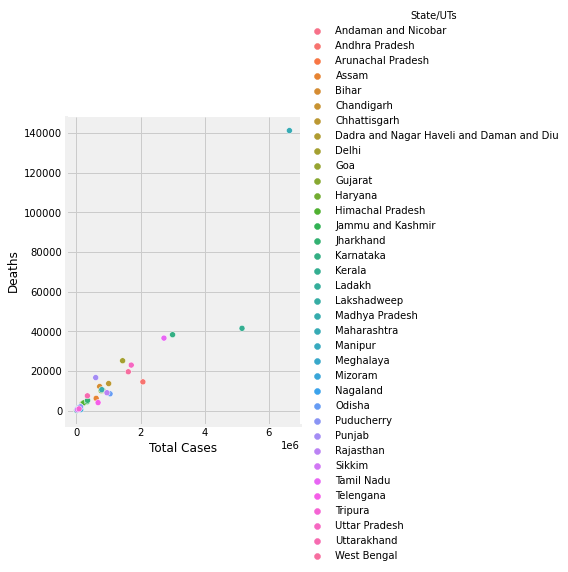

In [57]:
sns.relplot(x = 'Total Cases', y ='Deaths', hue = 'State/UTs', data = dataset)

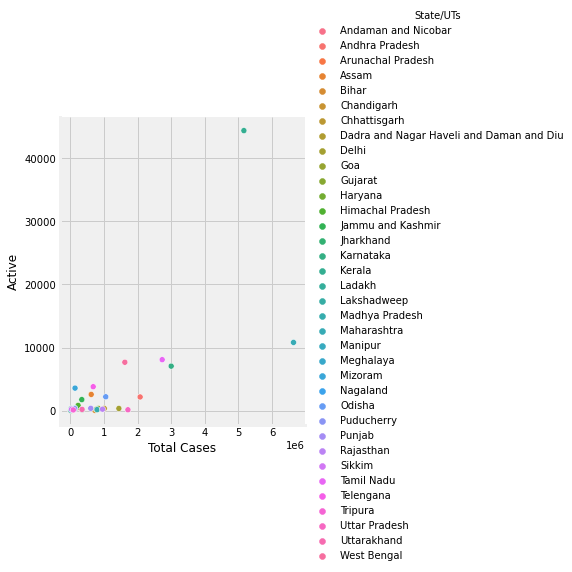

In [13]:
sns.relplot(x = 'Total Cases', y ='Active',hue = 'State/UTs', data = dataset)

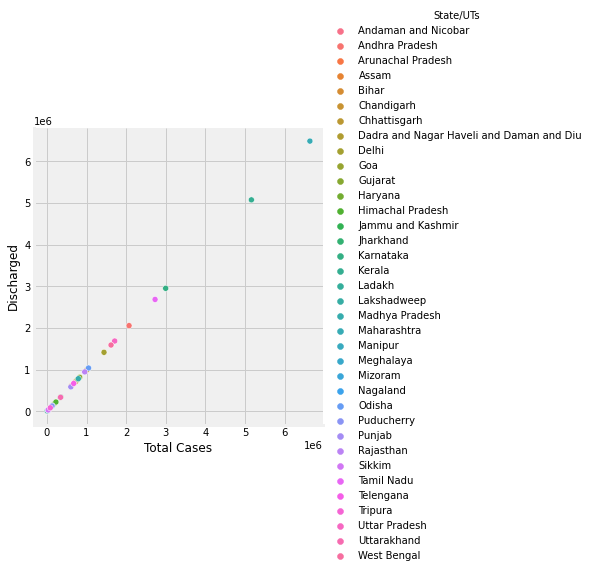

In [14]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = dataset)

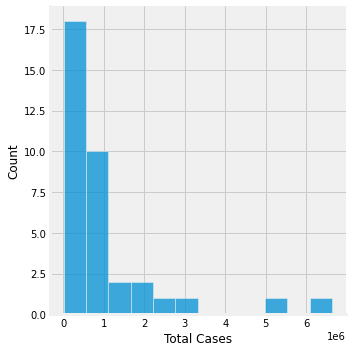

In [58]:
sns.displot(dataset['Total Cases'])

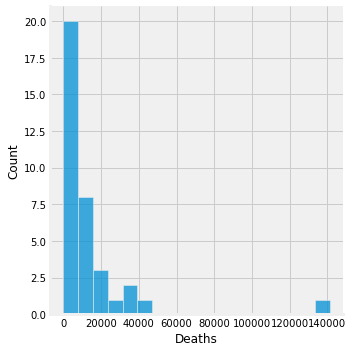

In [59]:
sns.displot(dataset['Deaths'])

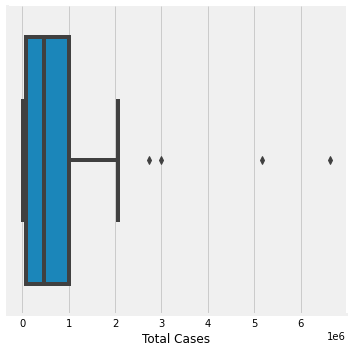

In [60]:
sns.catplot(x = 'Total Cases', kind = 'box', data = dataset)

In [61]:
dataset.style.background_gradient(cmap="Blues")

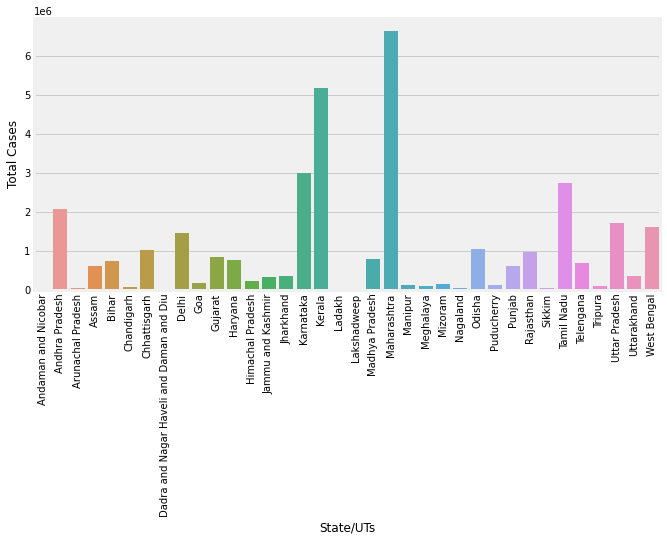

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['State/UTs'],y= dataset['Total Cases'])
plt.xticks(rotation=90)
plt.show()

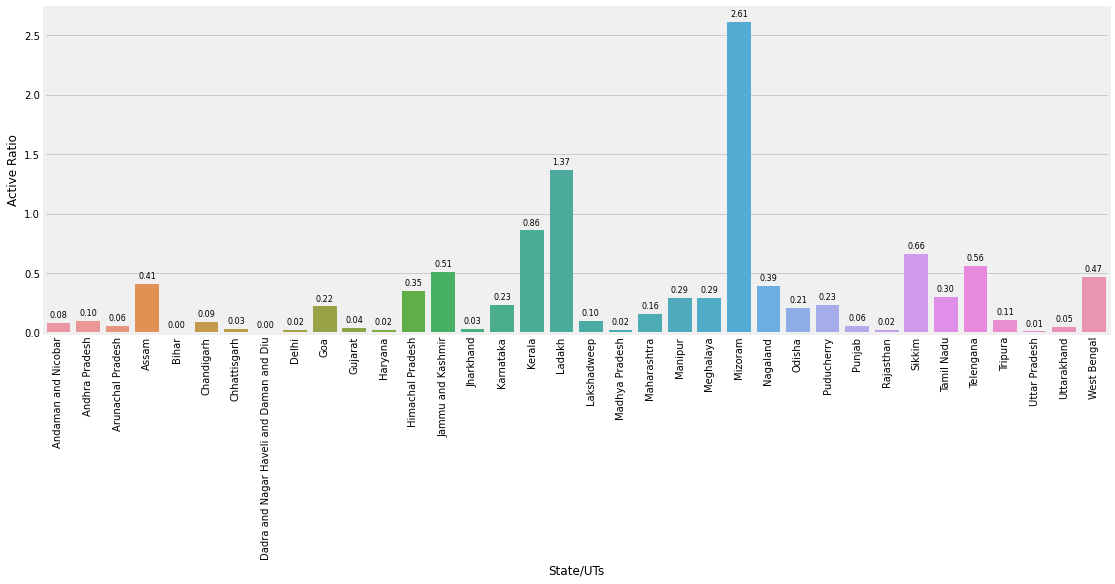

In [63]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= dataset['State/UTs'],y= dataset['Active Ratio'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

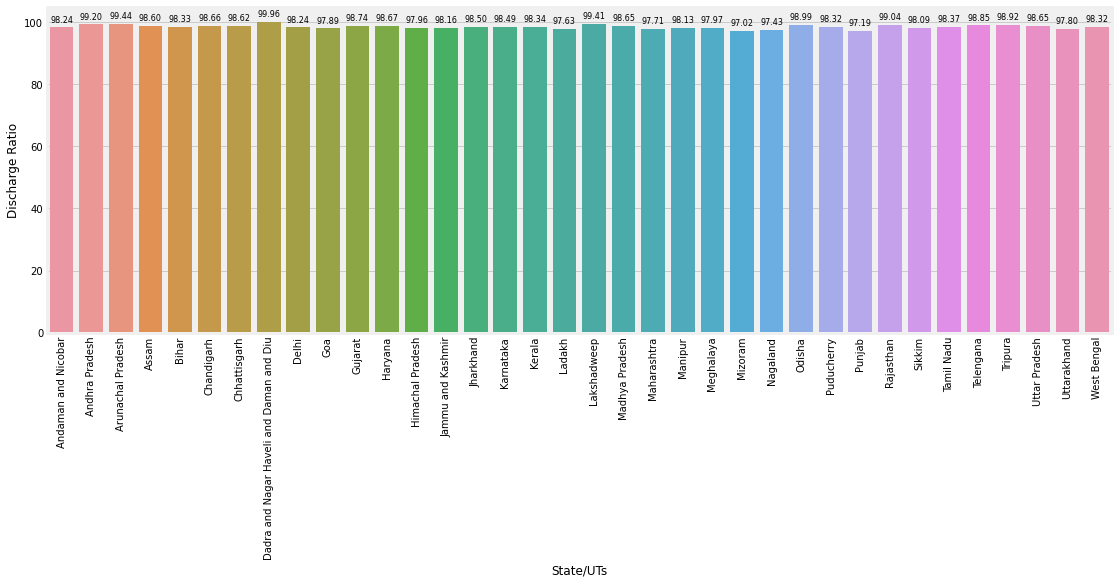

In [64]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= dataset['State/UTs'],y= dataset['Discharge Ratio'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

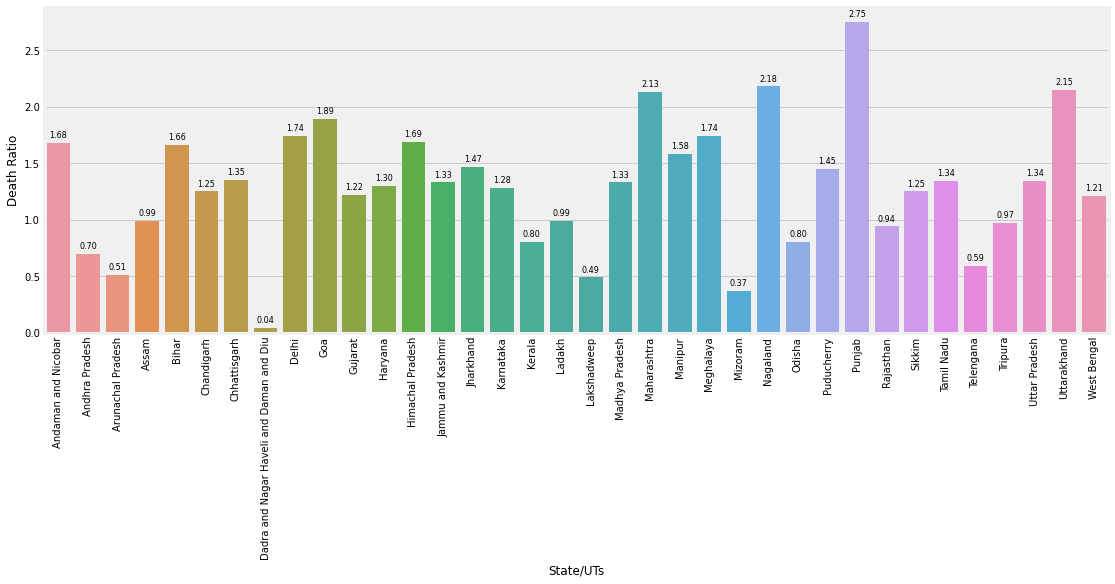

In [65]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x= dataset['State/UTs'],y= dataset['Death Ratio'])
plt.xticks(rotation=90)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
 

<AxesSubplot:>

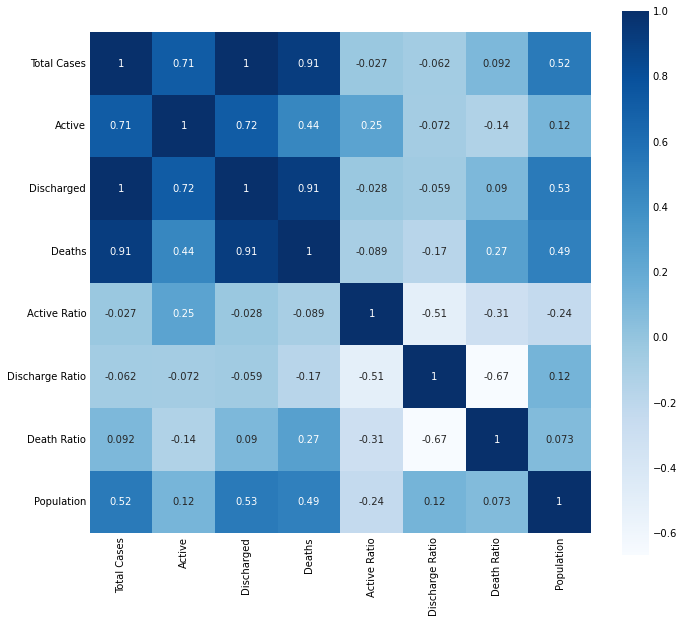

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True, square= True, cmap='Blues')

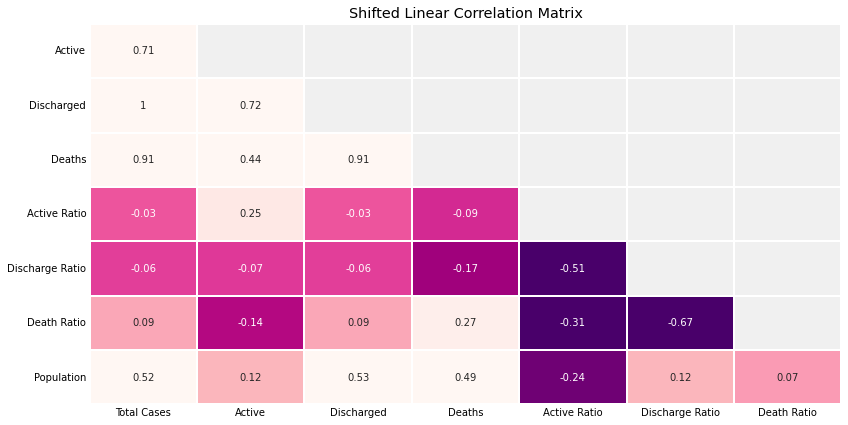

In [68]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(dataset.drop(['State/UTs'],axis = 1))

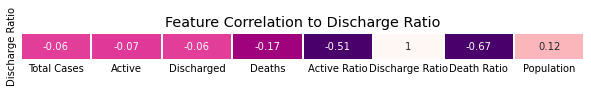

In [67]:
'''Plot Correlation to Target Variable only'''
def corrMat2(dataset,target='Discharge Ratio',figsize=(9,0.5),ret_id=False):
    
    corr_mat = dataset.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, dataset.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(dataset.drop(['State/UTs'],axis = 1))

In [69]:
dataset['State/UTs'].value_counts()

Andaman and Nicobar                         1
Andhra Pradesh                              1
Maharashtra                                 1
Manipur                                     1
Meghalaya                                   1
Mizoram                                     1
Nagaland                                    1
Odisha                                      1
Puducherry                                  1
Punjab                                      1
Rajasthan                                   1
Sikkim                                      1
Tamil Nadu                                  1
Telengana                                   1
Tripura                                     1
Uttar Pradesh                               1
Uttarakhand                                 1
Madhya Pradesh                              1
Lakshadweep                                 1
Ladakh                                      1
Delhi                                       1
Arunachal Pradesh                 

Active cases per states:


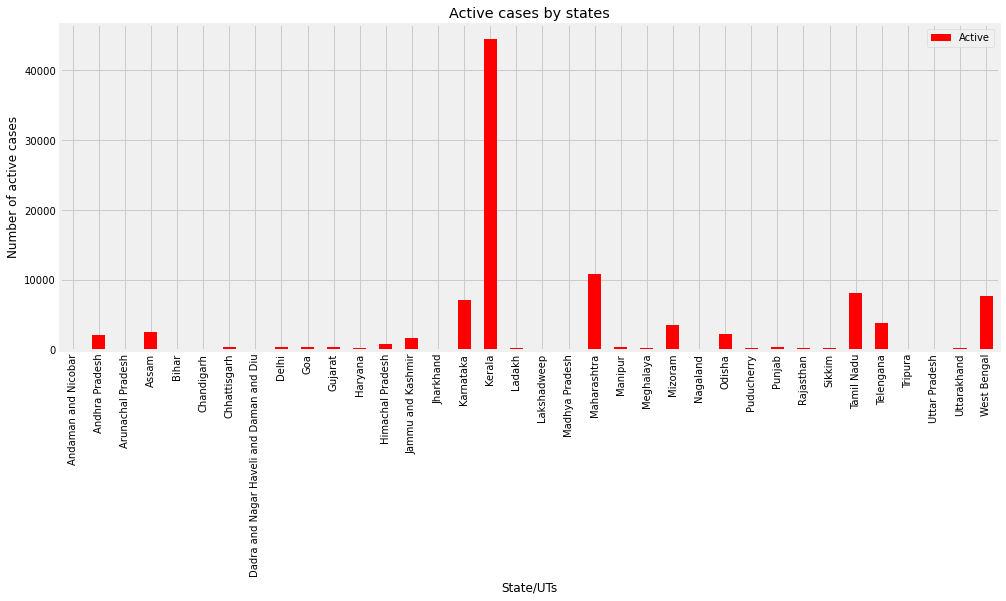

In [70]:
dataset.plot(kind='bar', x='State/UTs', y='Active',color="red", figsize=(15,6),
        title="Active cases by states", ylabel="Number of active cases")
print("Active cases per states:")

<function matplotlib.pyplot.show(close=None, block=None)>

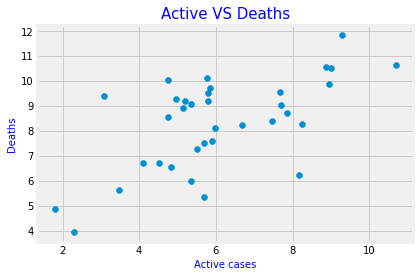

In [71]:
plt.scatter(np.log(dataset['Active']), np.log(dataset['Deaths']), marker='o')
plt.title("Active VS Deaths", fontdict={'size':15,'color':'blue'})
plt.xlabel("Active cases",fontdict={'size':10,'color':'blue'})
plt.ylabel("Deaths",fontdict={'size':10,'color':'blue'})
mpl.rc('figure',figsize=(10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

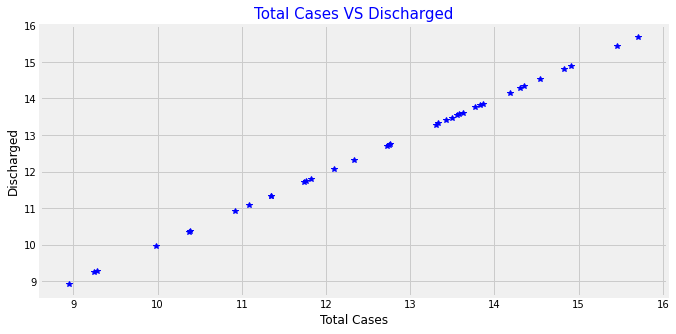

In [72]:
plt.plot(np.log(dataset['Total Cases']), np.log(dataset['Discharged']), 'b*')
plt.title("Total Cases VS Discharged",fontdict={'size':15,'color':'blue'})
plt.xlabel("Total Cases")
plt.ylabel("Discharged")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

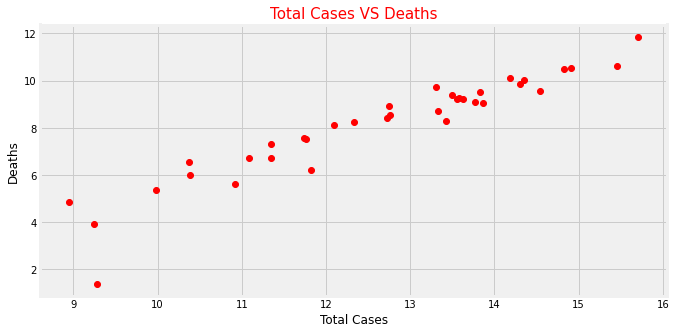

In [30]:
plt.plot(np.log(dataset['Total Cases']), np.log(dataset['Deaths']), 'ro')
plt.title("Total Cases VS Deaths",fontdict={'size':15,'color':'red'})
plt.xlabel("Total Cases")
plt.ylabel("Deaths")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

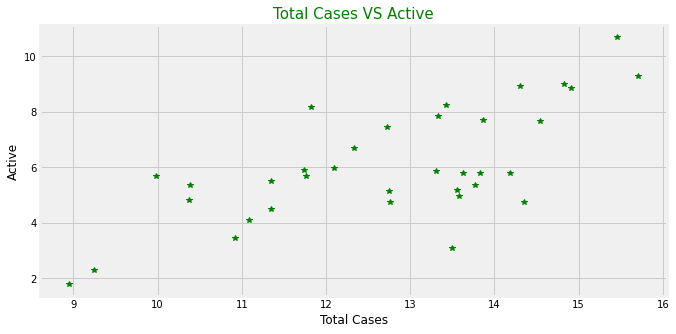

In [31]:
plt.plot(np.log(dataset['Total Cases']), np.log(dataset['Active']), 'g*')
plt.title("Total Cases VS Active",fontdict={'size':15,'color':'green'})
plt.xlabel("Total Cases")
plt.ylabel("Active")
plt.show

[   7688 2073576   55288  617475  726231   65481 1006942   10683 1441295
  179125  827659  771797  227483  337646  349317 2997643 5161471   21683
   10404  793232 6638071  125328   84574  136362   32136 1050060  129056
  603451  954874   32359 2729792  676787   84853 1710451  344345 1618637]


<function matplotlib.pyplot.show(close=None, block=None)>

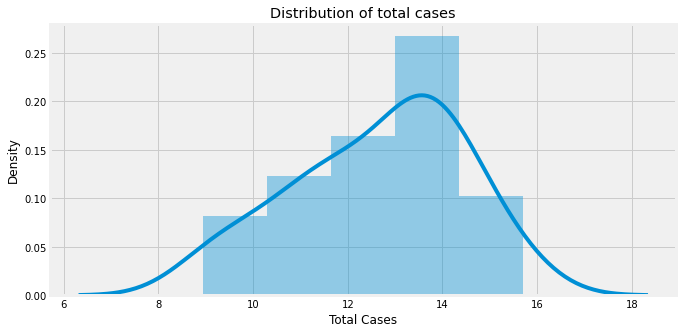

In [73]:
total_cases= np.array(dataset['Total Cases'])
print(total_cases)

sns.distplot(np.log(dataset['Total Cases']), kde=True)
plt.title("Distribution of total cases")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

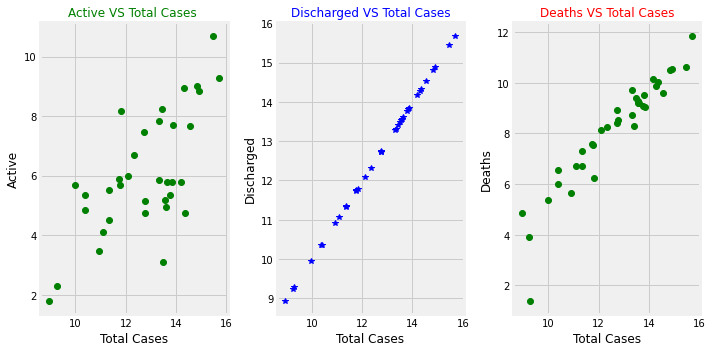

In [74]:
plt.subplot(1,3,1)
plt.plot(np.log(dataset['Total Cases']), np.log(dataset['Active']), 'go')
plt.title("Active VS Total Cases ",fontdict={'size':12,'color':'green'})
plt.xlabel("Total Cases")
plt.ylabel("Active")

plt.subplot(1,3,2)
plt.plot(np.log(dataset['Total Cases']), np.log(dataset['Discharged']), 'b*')
plt.title("Discharged VS Total Cases",fontdict={'size':12,'color':'blue'})
plt.xlabel("Total Cases")
plt.ylabel("Discharged")

plt.subplot(1,3,3)
plt.plot(np.log(dataset['Total Cases']), np.log(dataset['Deaths']), 'go')
plt.title("Deaths VS Total Cases",fontdict={'size':12,'color':'red'})
plt.xlabel("Total Cases")
plt.ylabel("Deaths")

plt.tight_layout()
plt.show

[ 8.94741595 14.54478521 10.92031117 13.33339386 13.49562343 11.0895153
 13.82242857  9.27640897 14.18105257 12.09583917 13.62635651 13.55647684
 12.33483079 12.72975329 12.7637351  14.91333687 15.45673217  9.98428382
  9.24994563 13.58387102 15.70833197 11.73868958 11.34538217 11.82306839
 10.37773218 13.86435786 11.7680017  13.31042012 13.76933467 10.38464747
 14.81973597 13.42511188 11.34867563 14.35226764 12.74939934 14.297095  ]
total cases per state as of 16th october 2021:


<bound method Figure.show of <Figure size 720x1440 with 1 Axes>>

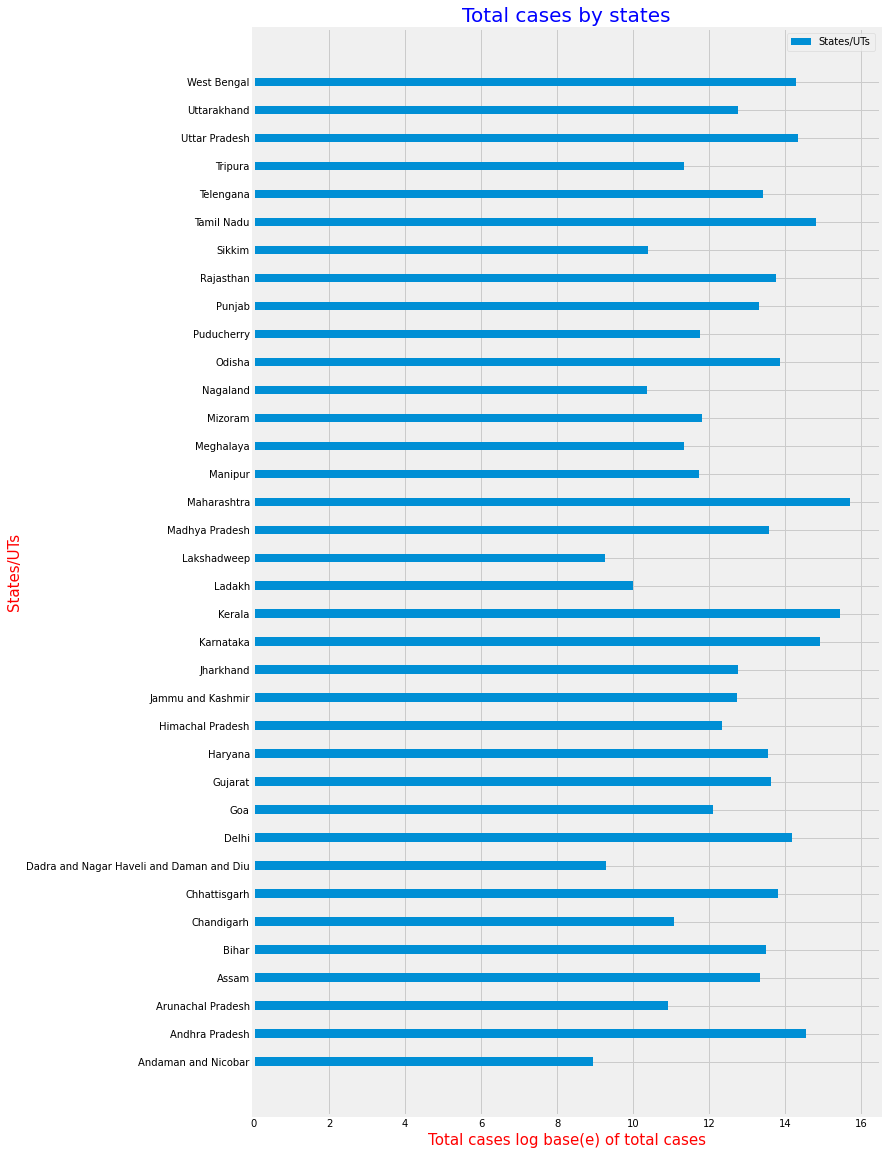

In [75]:
ylabel= np.array(dataset['State/UTs'])

xpoints = np.array(np.log(dataset['Total Cases']))
print(xpoints)
print("total cases per state as of 16th october 2021:")

fig, ax = plt.subplots()

ax.barh(ylabel,xpoints, label='States/UTs', height=0.3)
ax.set_title("Total cases by states",fontdict={'size':20,'color':'blue'})
ax.set_xlabel("Total cases log base(e) of total cases",fontdict={'size':15,'color':'red'})
ax.set_ylabel("States/UTs",fontdict={'size':15,'color':'red'})
ax.legend(loc='upper right')

fig.set_size_inches(10,20)
fig.show

total cases: 34633255
Actice cases:  99155
Discharged cases:  34060774
total deaths:  473326
[   99155 34060774   473326]


<function matplotlib.pyplot.show(close=None, block=None)>

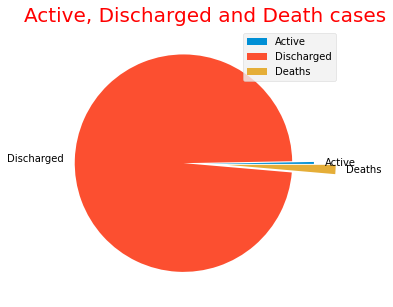

In [76]:
tc = np.sum(dataset['Total Cases'])
print("total cases:",tc)
ac = np.sum(dataset['Active'])
print("Actice cases: ", ac)
dc = np.sum(dataset['Discharged'])
print("Discharged cases: ", dc)
deaths = np.sum(dataset['Deaths'])
print("total deaths: ", deaths)

piec = np.array([ac, dc, deaths])
lebels= ["Active","Discharged", "Deaths"]
myexplode=[0,0.2,0.2]
print(piec)

plt.pie(piec, labels=lebels, explode=myexplode)
plt.title("Active, Discharged and Death cases",fontdict={'size':20,'color':'red'})
plt.legend()
plt.show

States with most number of deaths:  states
Maharashtra    141163
Kerala          41439
Karnataka       38224
Tamil Nadu      36519
Delhi           25098
Name: deaths, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

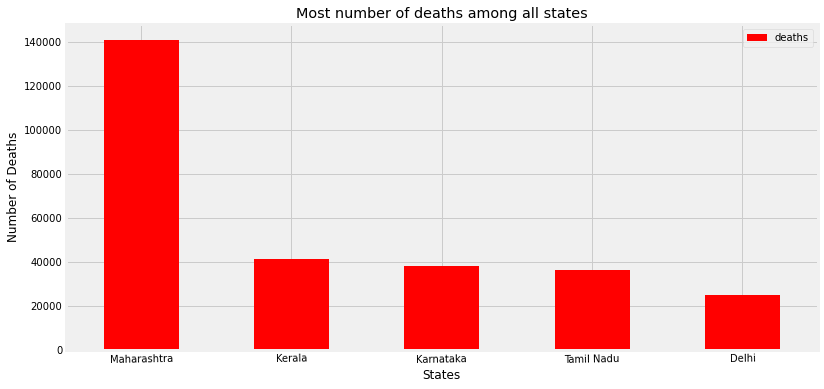

In [77]:
states = np.array(dataset['State/UTs'])
deaths = np.array(dataset['Deaths'])

ndf = pd.DataFrame({'states':states,
                    'deaths':deaths})

resetidx = ndf.set_index('states')
sorteddf = resetidx.deaths.sort_values(ascending=False).head()
print("States with most number of deaths: ",sorteddf)

sorteddf.plot(kind='bar', x='states', y='deaths',
             title='Most number of deaths among all states',
             figsize=(12,6),
             legend=True,
             xlabel="States",
             ylabel="Number of Deaths",
             fontsize=10,
             color="red",
             rot=1)
plt.show

statea with most active cases:
 Kerala         44427
Maharashtra    10803
Tamil Nadu      8070
West Bengal     7656
Karnataka       7041
Name: active, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

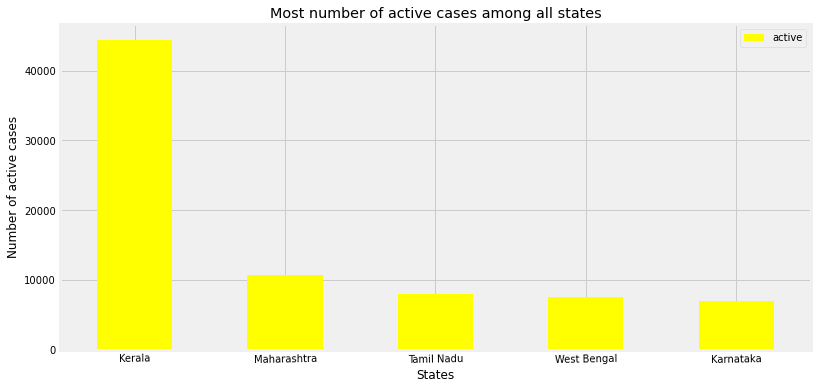

In [78]:
states = np.array(dataset['State/UTs'])
active = np.array(dataset['Active'])

ndf2 = pd.DataFrame({'states':states,
                     'active':active}, index=states)

sorted2= ndf2.active.sort_values(ascending=False).head()
print("statea with most active cases:\n",sorted2)

sorted2.plot.bar(title="Most number of active cases among all states",
                ylabel="Number of active cases",
                xlabel="States",
                figsize=(12,6),
                color="yellow",
                rot=1,
                legend=True,
                fontsize=10
                )
plt.show

[168.  70.  51.  99. 166. 125. 135.   4. 174. 189. 122. 130. 169. 133.
 147. 128.  80.  99.  49. 133. 213. 158. 174.  37. 218.  80. 145. 275.
  94. 125. 134.  59.  97. 134. 215. 121.]


<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

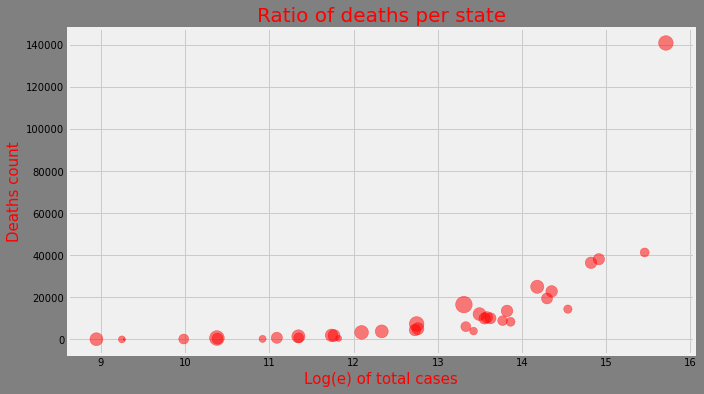

In [79]:
totalcases = np.array(np.log(dataset['Total Cases']))
deaths = np.array(dataset['Deaths'])
dratio = np.array(dataset['Death Ratio'])*100
print(dratio)

fig, ax=plt.subplots()

ax.scatter(totalcases,deaths, s=dratio, c='red', alpha=0.5)
ax.set_xlabel("Log(e) of total cases",fontdict={'size':15,'color':'red'})
ax.set_ylabel("Deaths count",fontdict={'size':15,'color':'red'})
ax.set_title("Ratio of deaths per state",fontdict={'size':20,'color':'red'})

fig.patch.set_facecolor("grey")
fig.set_size_inches(10,6)
fig.show

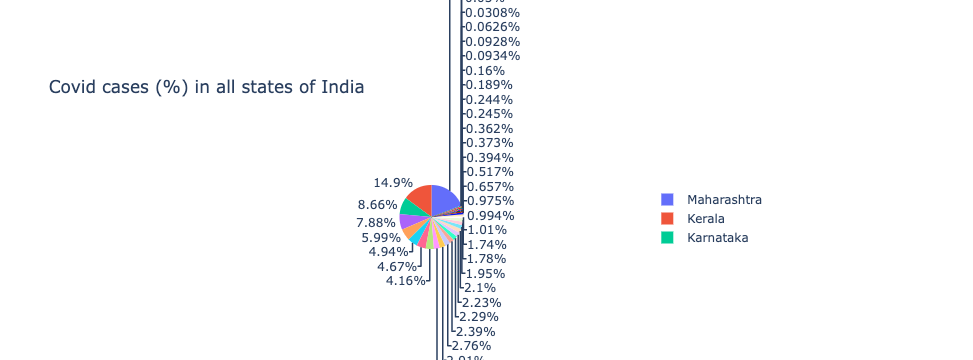

In [6]:
fig = px.pie(dataset, values='Total Cases', names=dataset['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

least number of discharged cases among each state:  Andaman and Nicobar                          7553
Lakshadweep                                 10343
Dadra and Nagar Haveli and Daman and Diu    10679
Ladakh                                      21170
Nagaland                                    31311
Name: discharged, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

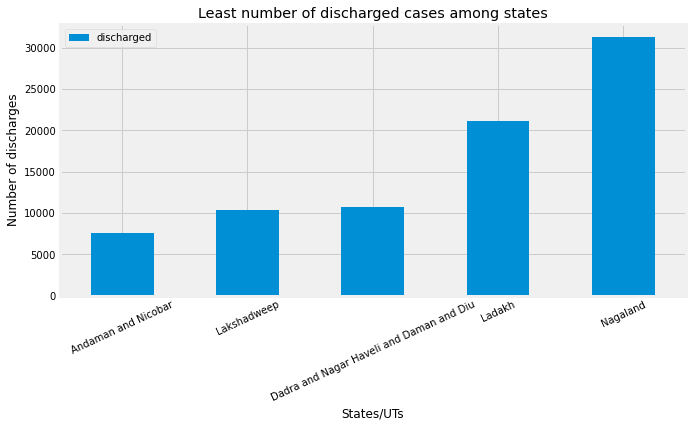

In [85]:
discharged = np.array(dataset['Discharged'])
states = np.array(dataset['State/UTs'])

ddf = pd.DataFrame({'discharged':discharged,
                     'states':states}, index = states)

sortddf = ddf.discharged.sort_values(ascending=True).head()
print("least number of discharged cases among each state: ",sortddf)

sortddf.plot.bar(title="Least number of discharged cases among states",
               xlabel="States/UTs",
               ylabel="Number of discharges",
               rot=25,
               fontsize=10,
               legend=True)

plt.show

<bound method Figure.show of <Figure size 1152x576 with 3 Axes>>

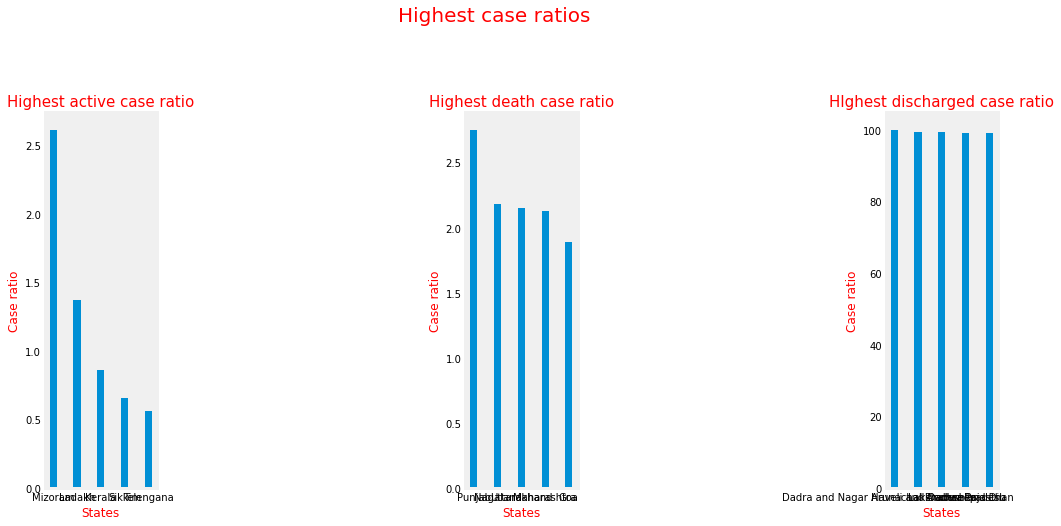

In [12]:
states= np.array(dataset['State/UTs'])
ar = np.array(dataset['Active Ratio'])
deathr = np.array(dataset['Death Ratio'])
disr = np.array(dataset['Discharge Ratio'])

ratiodf = pd.DataFrame({'active':ar,
                       'deaths':deathr,
                       'discharge':disr}, index=states)

ratiodf.active.sort_values(ascending=False).head()
x1 =np.array(ratiodf.active.sort_values(ascending=False).head().index)
y1 =np.array(ratiodf.active.sort_values(ascending=False).head())


ratiodf.deaths.sort_values(ascending=False).head()
x2 =np.array(ratiodf.deaths.sort_values(ascending=False).head().index)
y2 =np.array(ratiodf.deaths.sort_values(ascending=False).head())


ratiodf.discharge.sort_values(ascending=False).head()
x3 =np.array(ratiodf.discharge.sort_values(ascending=False).head().index)
y3 =np.array(ratiodf.discharge.sort_values(ascending=False).head())


fig, (ax0,ax1,ax2) =plt.subplots(1,3)

ax0.bar(x1,y1, width=0.3)
ax0.set_title("Highest active case ratio",fontdict={'size':15,'color':'red'})
ax0.set_xlabel("States",fontdict={'size':12,'color':'red'})
ax0.set_ylabel("Case ratio",fontdict={'size':12,'color':'red'})
ax0.grid()

ax1.bar(x2,y2,width=0.3)
ax1.set_title("Highest death case ratio",fontdict={'size':15,'color':'red'})
ax1.set_xlabel("States",fontdict={'size':12,'color':'red'})
ax1.set_ylabel("Case ratio",fontdict={'size':12,'color':'red'})
ax1.grid()

ax2.bar(x3,y3,width=0.3)
ax2.set_title("HIghest discharged case ratio",fontdict={'size':15,'color':'red'})
ax2.set_xlabel("States",fontdict={'size':12,'color':'red'})
ax2.set_ylabel("Case ratio",fontdict={'size':12,'color':'red'})
ax2.grid()

plt.suptitle("Highest case ratios",fontdict={'color':'red'}, fontsize=20)
fig.tight_layout()
fig.set_size_inches(16,8)
fig.show

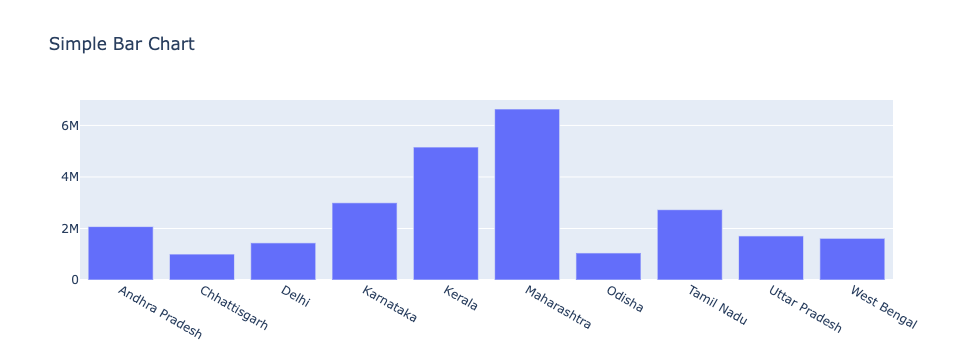

In [13]:
x = dataset[dataset['Total Cases'] > 1000000]['State/UTs']
y = dataset[dataset['Total Cases'] > 1000000]['Total Cases']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

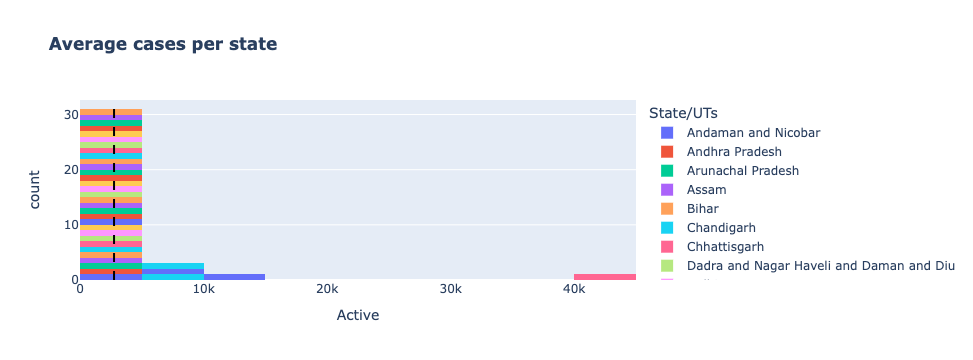

In [14]:
fig = px.histogram(dataset, 'Active',             
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=dataset['Active'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

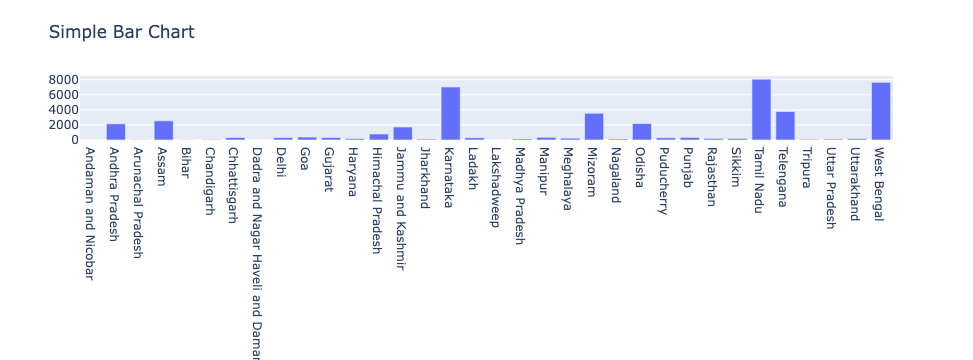

In [9]:
x = dataset[dataset['Active'] < 10000]['State/UTs']
y = dataset[dataset['Active'] < 10000]['Active']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

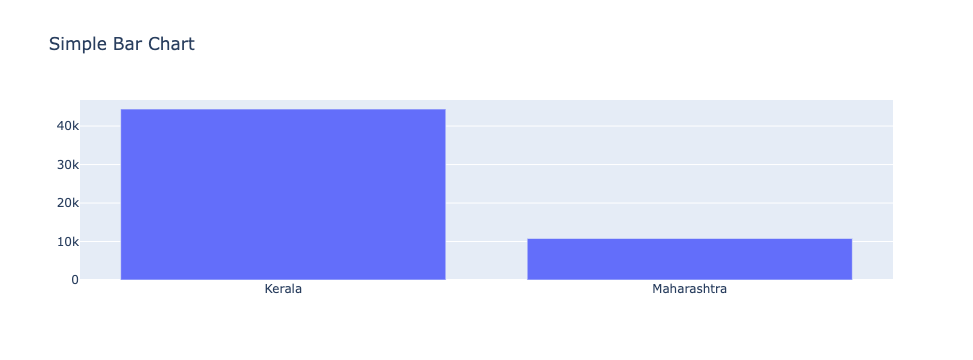

In [10]:
x = dataset[dataset['Active'] > 10000]['State/UTs']
y = dataset[dataset['Active'] > 10000]['Active']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [7]:
dataset1 = dataset[['State/UTs','Active']].sort_values('Active')
dataset1
# This dataframe is arranged in ascending order of active cases now we can clearly see with state has less total cases

State/UTs  Active
7   Dadra and Nagar Haveli and Daman and Diu       0
0                        Andaman and Nicobar       6
18                               Lakshadweep      10
4                                      Bihar      22
2                          Arunachal Pradesh      32
5                                 Chandigarh      60
32                                   Tripura      91
14                                 Jharkhand     115
33                             Uttar Pradesh     116
24                                  Nagaland     126
19                            Madhya Pradesh     142
34                               Uttarakhand     173
11                                   Haryana     180
29                                    Sikkim     213
28                                 Rajasthan     213
22                                 Meghalaya     246
26                                Puducherry     294
17                                    Ladakh     298
8                                      Delhi     322
10                                   Gujarat     326
6                               Chhattisgarh     326
27                                    Punjab     347
21                                   Manipur     362
9                                        Goa     394
12                          Himachal Pradesh     800
13                         Jammu and Kashmir    1731
1                             Andhra Pradesh    2149
25                                    Odisha    2179
3                                      Assam    2551
23                                   Mizoram    3555
31                                 Telengana    3779
15                                 Karnataka    7041
35                               West Bengal    7656
30                                Tamil Nadu    8070
20                               Maharashtra   10803
16                                    Kerala   44427

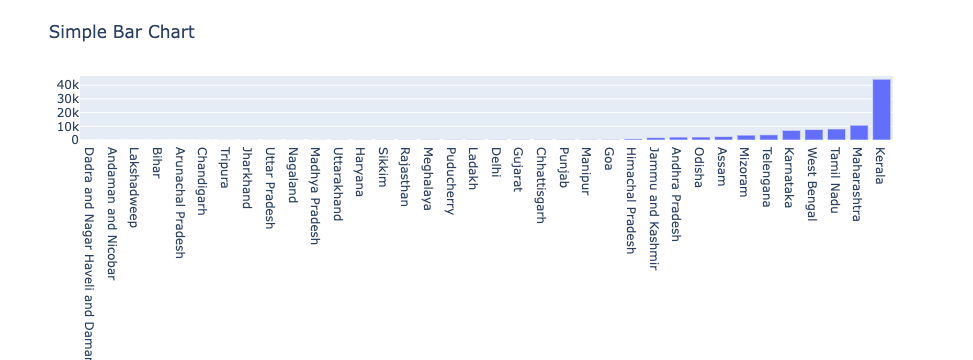

In [8]:
x = dataset1['State/UTs']
y = dataset1['Active']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

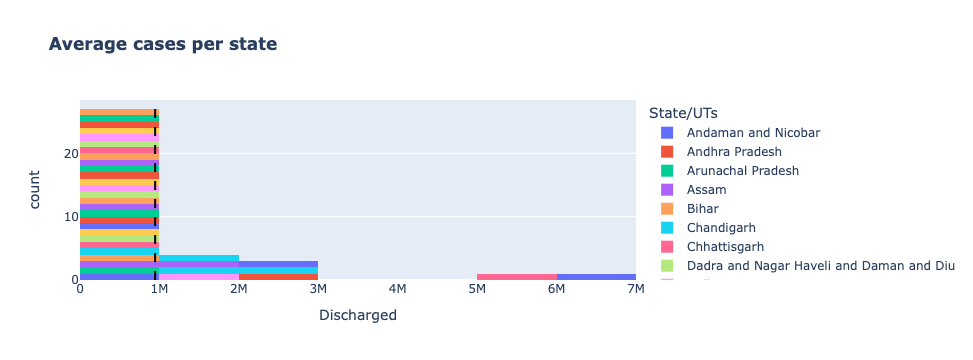

In [9]:
fig = px.histogram(dataset, 'Discharged',             
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=dataset['Discharged'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [10]:
dataset[dataset['Discharged'] < 100000]['State/UTs']
# States with discharged cases less than 1M

0                          Andaman and Nicobar
2                            Arunachal Pradesh
5                                   Chandigarh
7     Dadra and Nagar Haveli and Daman and Diu
17                                      Ladakh
18                                 Lakshadweep
22                                   Meghalaya
24                                    Nagaland
29                                      Sikkim
32                                     Tripura
Name: State/UTs, dtype: object

In [11]:
dataset[dataset['Discharged'] < 100000]['State/UTs'].count()
# count of them

10

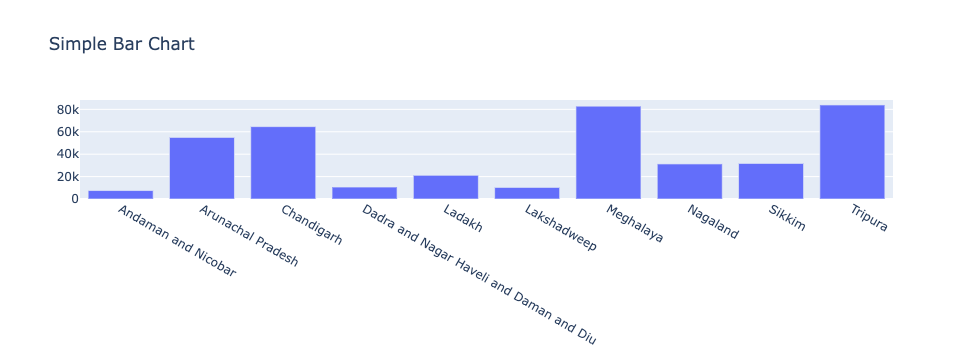

In [12]:
x = dataset[dataset['Discharged'] < 100000]['State/UTs']
y = dataset[dataset['Discharged'] < 100000]['Discharged']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [13]:
dataset[dataset['Discharged'] > 100000]['State/UTs']

1        Andhra Pradesh
3                 Assam
4                 Bihar
6          Chhattisgarh
8                 Delhi
9                   Goa
10              Gujarat
11              Haryana
12     Himachal Pradesh
13    Jammu and Kashmir
14            Jharkhand
15            Karnataka
16               Kerala
19       Madhya Pradesh
20          Maharashtra
21              Manipur
23              Mizoram
25               Odisha
26           Puducherry
27               Punjab
28            Rajasthan
30           Tamil Nadu
31            Telengana
33        Uttar Pradesh
34          Uttarakhand
35          West Bengal
Name: State/UTs, dtype: object

In [14]:
dataset[dataset['Discharged'] > 100000]['State/UTs'].count()

26

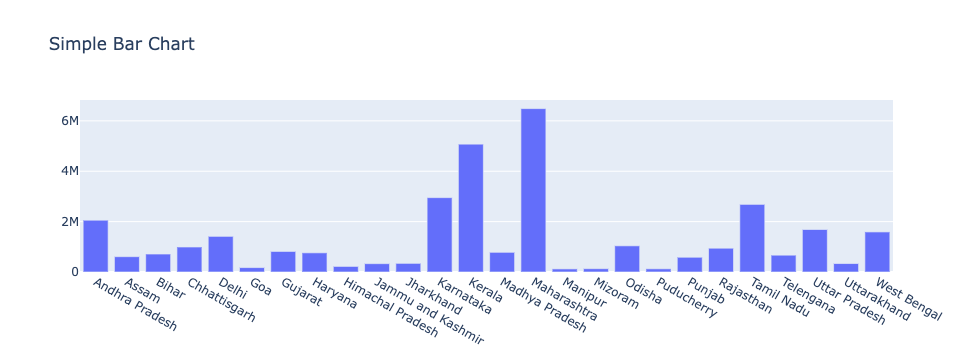

In [15]:
x = dataset[dataset['Discharged'] > 100000]['State/UTs']
y = dataset[dataset['Discharged'] > 100000]['Discharged']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [17]:
dataset2 = dataset[['State/UTs','Discharged']].sort_values('Discharged')
dataset2

State/UTs  Discharged
0                        Andaman and Nicobar        7553
18                               Lakshadweep       10343
7   Dadra and Nagar Haveli and Daman and Diu       10679
17                                    Ladakh       21170
24                                  Nagaland       31311
29                                    Sikkim       31741
2                          Arunachal Pradesh       54976
5                                 Chandigarh       64601
22                                 Meghalaya       82853
32                                   Tripura       83937
21                                   Manipur      122985
26                                Puducherry      126887
23                                   Mizoram      132302
9                                        Goa      175344
12                          Himachal Pradesh      222831
13                         Jammu and Kashmir      331436
34                               Uttarakhand      336761
14                                 Jharkhand      344061
27                                    Punjab      586496
3                                      Assam      608808
31                                 Telengana      669010
4                                      Bihar      714119
11                                   Haryana      761563
19                            Madhya Pradesh      782562
10                                   Gujarat      817239
28                                 Rajasthan      945706
6                               Chhattisgarh      993023
25                                    Odisha     1039461
8                                      Delhi     1415875
35                               West Bengal     1591447
33                             Uttar Pradesh     1687424
1                             Andhra Pradesh     2056979
30                                Tamil Nadu     2685203
15                                 Karnataka     2952378
16                                    Kerala     5075605
20                               Maharashtra     6486105

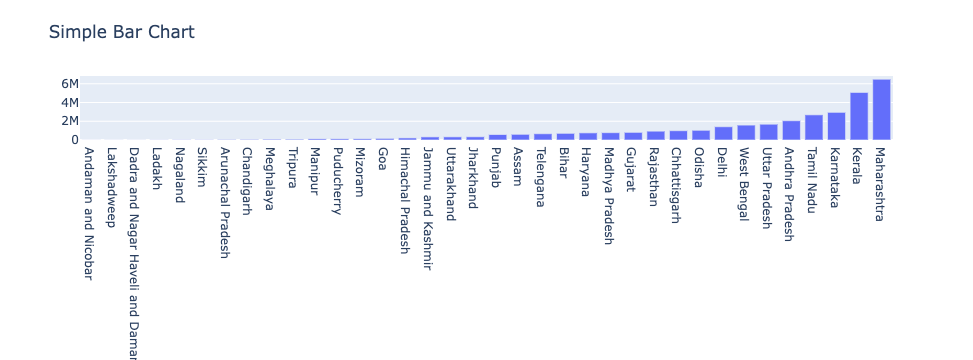

In [18]:
x = dataset2['State/UTs']
y = dataset2['Discharged']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

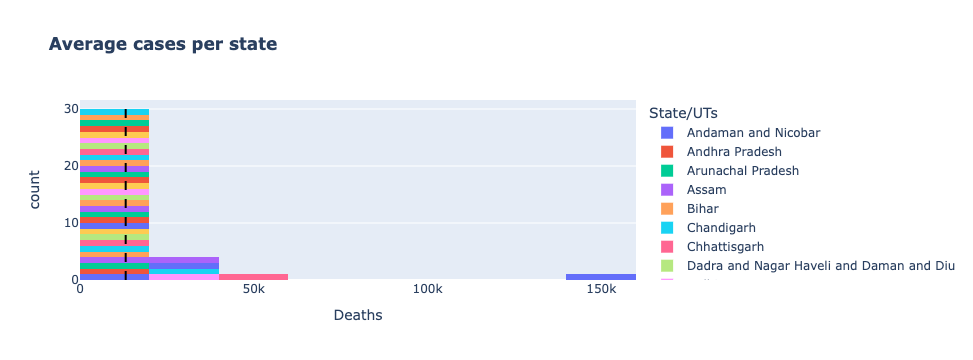

In [19]:
fig = px.histogram(dataset, 'Deaths',             
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=dataset['Deaths'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [20]:
dataset[dataset['Deaths'] < 20000]['State/UTs']
# States with deaths less than 20k

0                          Andaman and Nicobar
1                               Andhra Pradesh
2                            Arunachal Pradesh
3                                        Assam
4                                        Bihar
5                                   Chandigarh
6                                 Chhattisgarh
7     Dadra and Nagar Haveli and Daman and Diu
9                                          Goa
10                                     Gujarat
11                                     Haryana
12                            Himachal Pradesh
13                           Jammu and Kashmir
14                                   Jharkhand
17                                      Ladakh
18                                 Lakshadweep
19                              Madhya Pradesh
21                                     Manipur
22                                   Meghalaya
23                                     Mizoram
24                                    Nagaland
25           

In [21]:
dataset[dataset['Deaths'] < 20000]['State/UTs'].count()

30

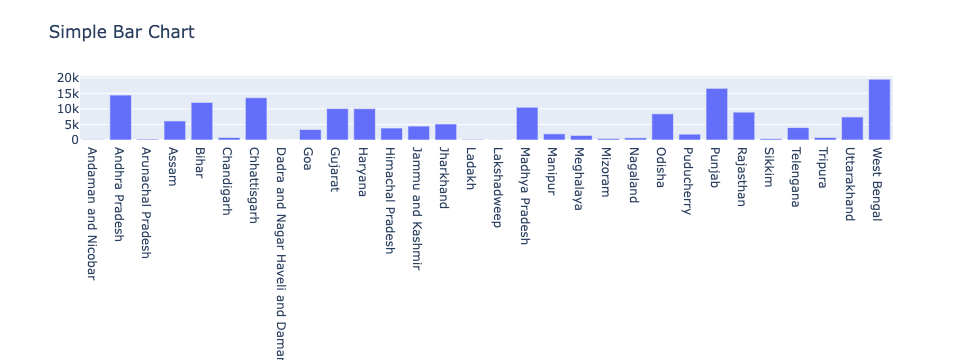

In [22]:
x = dataset[dataset['Deaths'] < 20000]['State/UTs']
y =dataset[dataset['Deaths'] < 20000]['Deaths']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [23]:
dataset[dataset['Deaths'] > 20000]['State/UTs']
# States with deaths morethan 20k

8             Delhi
15        Karnataka
16           Kerala
20      Maharashtra
30       Tamil Nadu
33    Uttar Pradesh
Name: State/UTs, dtype: object

In [24]:
dataset[dataset['Deaths'] > 20000]['State/UTs'].count()

6

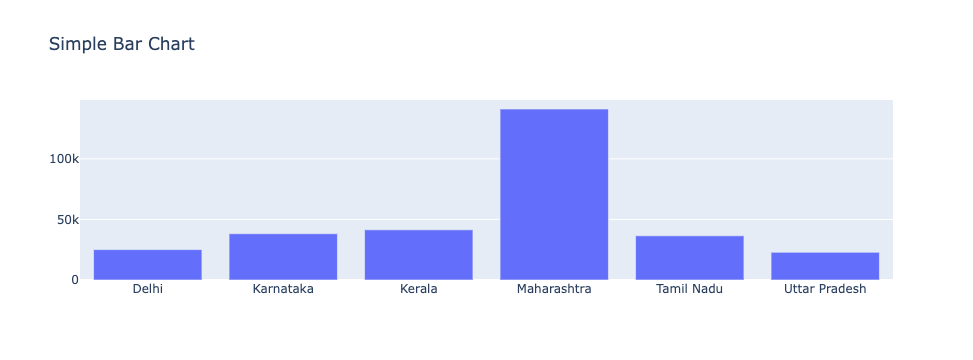

In [25]:
x = dataset[dataset['Deaths'] > 20000]['State/UTs']
y =dataset[dataset['Deaths'] > 20000]['Deaths']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [26]:
dataset3 = dataset[['State/UTs','Deaths']].sort_values('Deaths')
dataset3
# This dataframe is arranged in ascending order of deaths now we can clearly see with state has less total cases

State/UTs  Deaths
7   Dadra and Nagar Haveli and Daman and Diu       4
18                               Lakshadweep      51
0                        Andaman and Nicobar     129
17                                    Ladakh     215
2                          Arunachal Pradesh     280
29                                    Sikkim     405
23                                   Mizoram     505
24                                  Nagaland     699
5                                 Chandigarh     820
32                                   Tripura     825
22                                 Meghalaya    1475
26                                Puducherry    1875
21                                   Manipur    1981
9                                        Goa    3387
12                          Himachal Pradesh    3852
31                                 Telengana    3998
13                         Jammu and Kashmir    4479
14                                 Jharkhand    5141
3                                      Assam    6116
34                               Uttarakhand    7411
25                                    Odisha    8420
28                                 Rajasthan    8955
11                                   Haryana   10054
10                                   Gujarat   10094
19                            Madhya Pradesh   10528
4                                      Bihar   12090
6                               Chhattisgarh   13593
1                             Andhra Pradesh   14448
27                                    Punjab   16608
35                               West Bengal   19534
33                             Uttar Pradesh   22911
8                                      Delhi   25098
30                                Tamil Nadu   36519
15                                 Karnataka   38224
16                                    Kerala   41439
20                               Maharashtra  141163

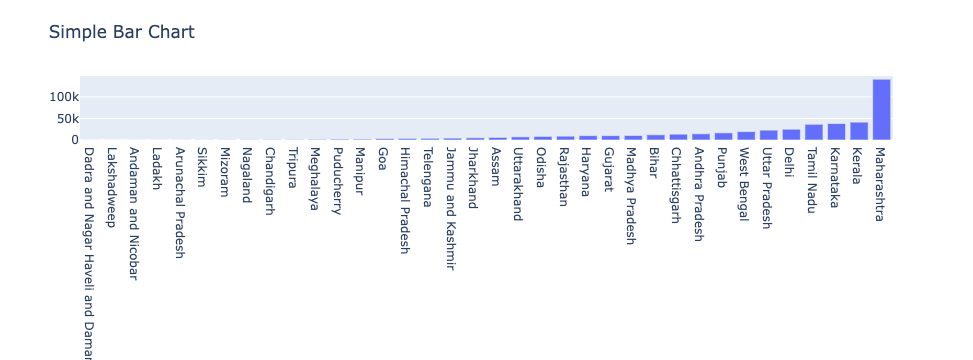

In [27]:
x = dataset3['State/UTs']
y = dataset3['Deaths']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

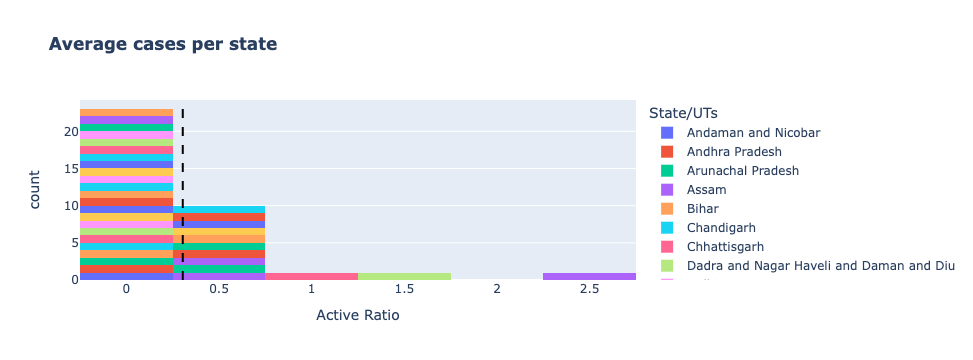

In [28]:
fig = px.histogram(dataset, 'Active Ratio',             
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=dataset['Active Ratio'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [29]:
dataset4 = dataset[['State/UTs','Active Ratio']].sort_values('Active Ratio')
dataset4

State/UTs  Active Ratio
4                                      Bihar          0.00
7   Dadra and Nagar Haveli and Daman and Diu          0.00
33                             Uttar Pradesh          0.01
28                                 Rajasthan          0.02
19                            Madhya Pradesh          0.02
11                                   Haryana          0.02
8                                      Delhi          0.02
14                                 Jharkhand          0.03
6                               Chhattisgarh          0.03
10                                   Gujarat          0.04
34                               Uttarakhand          0.05
27                                    Punjab          0.06
2                          Arunachal Pradesh          0.06
0                        Andaman and Nicobar          0.08
5                                 Chandigarh          0.09
1                             Andhra Pradesh          0.10
18                               Lakshadweep          0.10
32                                   Tripura          0.11
20                               Maharashtra          0.16
25                                    Odisha          0.21
9                                        Goa          0.22
15                                 Karnataka          0.23
26                                Puducherry          0.23
21                                   Manipur          0.29
22                                 Meghalaya          0.29
30                                Tamil Nadu          0.30
12                          Himachal Pradesh          0.35
24                                  Nagaland          0.39
3                                      Assam          0.41
35                               West Bengal          0.47
13                         Jammu and Kashmir          0.51
31                                 Telengana          0.56
29                                    Sikkim          0.66
16                                    Kerala          0.86
17                                    Ladakh          1.37
23                                   Mizoram          2.61

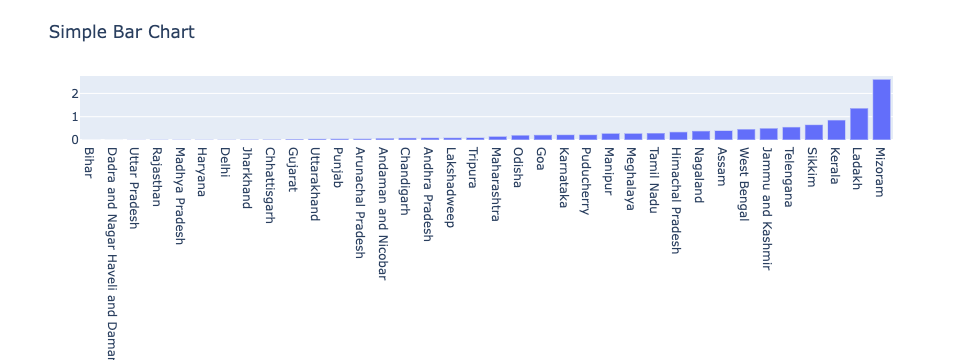

In [30]:
x = dataset4['State/UTs']
y = dataset4['Active Ratio']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

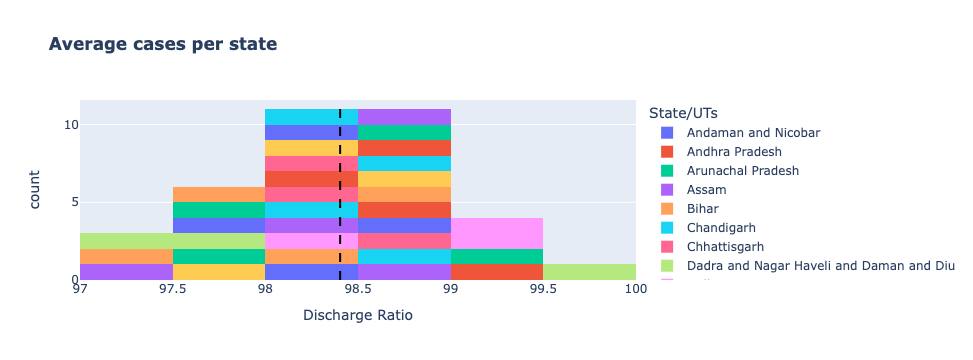

In [31]:
fig = px.histogram(dataset, 'Discharge Ratio',             
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=dataset['Discharge Ratio'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [32]:
dataset5 = dataset[['State/UTs','Discharge Ratio']].sort_values('Discharge Ratio')
dataset5

State/UTs  Discharge Ratio
23                                   Mizoram            97.02
27                                    Punjab            97.19
24                                  Nagaland            97.43
17                                    Ladakh            97.63
20                               Maharashtra            97.71
34                               Uttarakhand            97.80
9                                        Goa            97.89
12                          Himachal Pradesh            97.96
22                                 Meghalaya            97.97
29                                    Sikkim            98.09
21                                   Manipur            98.13
13                         Jammu and Kashmir            98.16
0                        Andaman and Nicobar            98.24
8                                      Delhi            98.24
35                               West Bengal            98.32
26                                Puducherry            98.32
4                                      Bihar            98.33
16                                    Kerala            98.34
30                                Tamil Nadu            98.37
15                                 Karnataka            98.49
14                                 Jharkhand            98.50
3                                      Assam            98.60
6                               Chhattisgarh            98.62
19                            Madhya Pradesh            98.65
33                             Uttar Pradesh            98.65
5                                 Chandigarh            98.66
11                                   Haryana            98.67
10                                   Gujarat            98.74
31                                 Telengana            98.85
32                                   Tripura            98.92
25                                    Odisha            98.99
28                                 Rajasthan            99.04
1                             Andhra Pradesh            99.20
18                               Lakshadweep            99.41
2                          Arunachal Pradesh            99.44
7   Dadra and Nagar Haveli and Daman and Diu            99.96

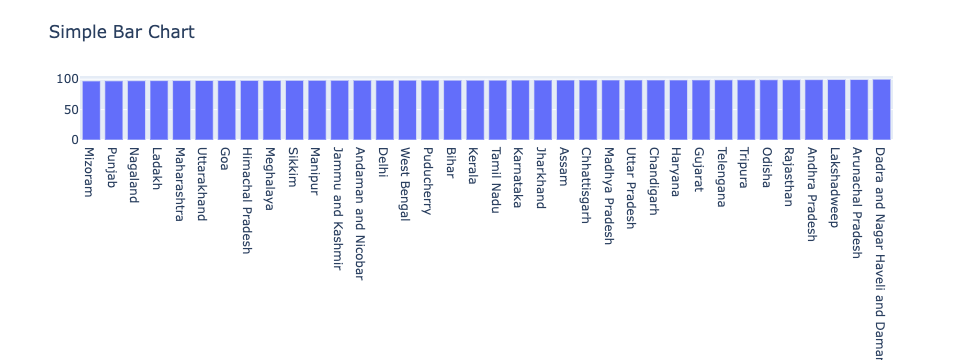

In [33]:
x = dataset5['State/UTs']
y = dataset5['Discharge Ratio']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

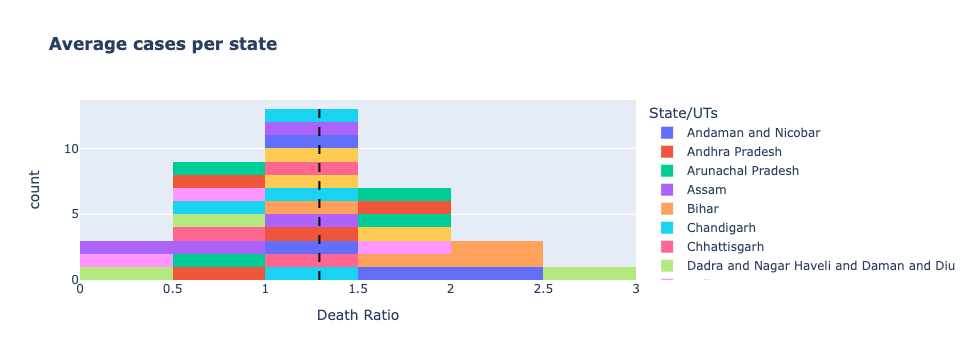

In [34]:
fig = px.histogram(dataset, 'Death Ratio',             
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=dataset['Death Ratio'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [35]:
dataset6 = dataset[['State/UTs','Death Ratio']].sort_values('Death Ratio')
dataset6

State/UTs  Death Ratio
7   Dadra and Nagar Haveli and Daman and Diu         0.04
23                                   Mizoram         0.37
18                               Lakshadweep         0.49
2                          Arunachal Pradesh         0.51
31                                 Telengana         0.59
1                             Andhra Pradesh         0.70
25                                    Odisha         0.80
16                                    Kerala         0.80
28                                 Rajasthan         0.94
32                                   Tripura         0.97
17                                    Ladakh         0.99
3                                      Assam         0.99
35                               West Bengal         1.21
10                                   Gujarat         1.22
5                                 Chandigarh         1.25
29                                    Sikkim         1.25
15                                 Karnataka         1.28
11                                   Haryana         1.30
13                         Jammu and Kashmir         1.33
19                            Madhya Pradesh         1.33
33                             Uttar Pradesh         1.34
30                                Tamil Nadu         1.34
6                               Chhattisgarh         1.35
26                                Puducherry         1.45
14                                 Jharkhand         1.47
21                                   Manipur         1.58
4                                      Bihar         1.66
0                        Andaman and Nicobar         1.68
12                          Himachal Pradesh         1.69
8                                      Delhi         1.74
22                                 Meghalaya         1.74
9                                        Goa         1.89
20                               Maharashtra         2.13
34                               Uttarakhand         2.15
24                                  Nagaland         2.18
27                                    Punjab         2.75

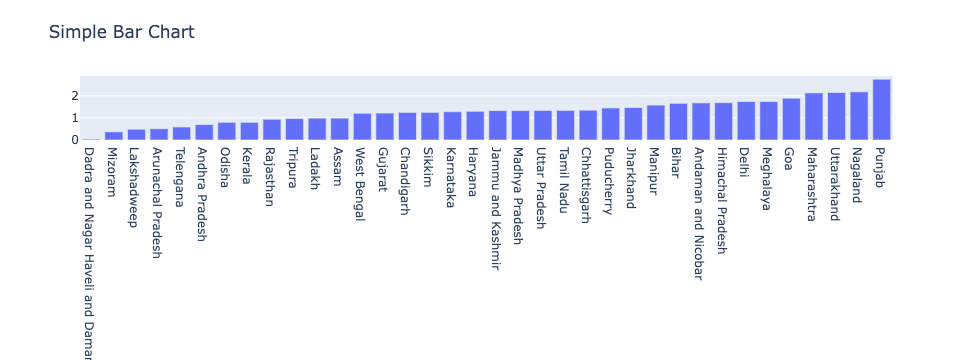

In [36]:
x = dataset6['State/UTs']
y = dataset6['Death Ratio']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [37]:
a = []
for i in dataset1['State/UTs'].tail(5):
    a.append(i)
dataset1.tail()

State/UTs  Active
15    Karnataka    7041
35  West Bengal    7656
30   Tamil Nadu    8070
20  Maharashtra   10803
16       Kerala   44427

In [38]:
for i in dataset2['State/UTs'].tail(5):
    a.append(i)
dataset2.tail()

State/UTs  Discharged
1   Andhra Pradesh     2056979
30      Tamil Nadu     2685203
15       Karnataka     2952378
16          Kerala     5075605
20     Maharashtra     6486105

In [39]:
for i in dataset3['State/UTs'].tail(5):
    a.append(i)
dataset3.tail()

State/UTs  Deaths
8         Delhi   25098
30   Tamil Nadu   36519
15    Karnataka   38224
16       Kerala   41439
20  Maharashtra  141163

In [40]:
for i in dataset4['State/UTs'].tail(5):
    a.append(i)
dataset4.tail()

State/UTs  Active Ratio
31  Telengana          0.56
29     Sikkim          0.66
16     Kerala          0.86
17     Ladakh          1.37
23    Mizoram          2.61

In [41]:
for i in dataset5['State/UTs'].tail(5):
    a.append(i)
dataset5.tail()

State/UTs  Discharge Ratio
28                                 Rajasthan            99.04
1                             Andhra Pradesh            99.20
18                               Lakshadweep            99.41
2                          Arunachal Pradesh            99.44
7   Dadra and Nagar Haveli and Daman and Diu            99.96

In [42]:
for i in dataset6['State/UTs'].tail(5):
    a.append(i)
dataset6.tail()

State/UTs  Death Ratio
9           Goa         1.89
20  Maharashtra         2.13
34  Uttarakhand         2.15
24     Nagaland         2.18
27       Punjab         2.75

In [43]:
a
len(a)

30

In [44]:
c = []
for i in a:
    if i not in c:
        c.append(i)
c
# removing repeated states

['Karnataka',
 'West Bengal',
 'Tamil Nadu',
 'Maharashtra',
 'Kerala',
 'Andhra Pradesh',
 'Delhi',
 'Telengana',
 'Sikkim',
 'Ladakh',
 'Mizoram',
 'Rajasthan',
 'Lakshadweep',
 'Arunachal Pradesh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Goa',
 'Uttarakhand',
 'Nagaland',
 'Punjab']

In [45]:
v = dataset['State/UTs'].index.values
v

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [46]:
m = []
for i in range(len(v)):
    if dataset['State/UTs'][i] in c:
        m.append(v[i])
m

[1, 2, 7, 8, 9, 15, 16, 17, 18, 20, 23, 24, 27, 28, 29, 30, 31, 34, 35]

In [47]:
dataset7 = dataset.loc[m]
dataset7

State/UTs  Total Cases  Active  Discharged  \
1                             Andhra Pradesh      2073576    2149     2056979   
2                          Arunachal Pradesh        55288      32       54976   
7   Dadra and Nagar Haveli and Daman and Diu        10683       0       10679   
8                                      Delhi      1441295     322     1415875   
9                                        Goa       179125     394      175344   
15                                 Karnataka      2997643    7041     2952378   
16                                    Kerala      5161471   44427     5075605   
17                                    Ladakh        21683     298       21170   
18                               Lakshadweep        10404      10       10343   
20                               Maharashtra      6638071   10803     6486105   
23                                   Mizoram       136362    3555      132302   
24                                  Nagaland        32136     126       31311   
27                                    Punjab       603451     347      586496   
28                                 Rajasthan       954874     213      945706   
29                                    Sikkim        32359     213       31741   
30                                Tamil Nadu      2729792    8070     2685203   
31                                 Telengana       676787    3779      669010   
34                               Uttarakhand       344345     173      336761   
35                               West Bengal      1618637    7656     1591447   

    Deaths  Active Ratio  Discharge Ratio  Death Ratio  Population  
1    14448          0.10            99.20         0.70    91702478  
2      280          0.06            99.44         0.51     1711947  
7        4          0.00            99.96         0.04      773997  
8    25098          0.02            98.24         1.74    19301096  
9     3387          0.22            97.89         1.89     1521992  
15   38224          0.23            98.49         1.28    69599762  
16   41439          0.86            98.34         0.80    34698876  
17     215          1.37            97.63         0.99      290492  
18      51          0.10            99.41         0.49       66001  
20  141163          0.16            97.71         2.13   124904071  
23     505          2.61            97.02         0.37     1308967  
24     699          0.39            97.43         2.18     2073074  
27   16608          0.06            97.19         2.75    30501026  
28    8955          0.02            99.04         0.94    79502477  
29     405          0.66            98.09         1.25      658019  
30   36519          0.30            98.37         1.34    83697770  
31    3998          0.56            98.85         0.59    38157311  
34    7411          0.05            97.80         2.15    11700099  
35   19534          0.47            98.32         1.21   100896618

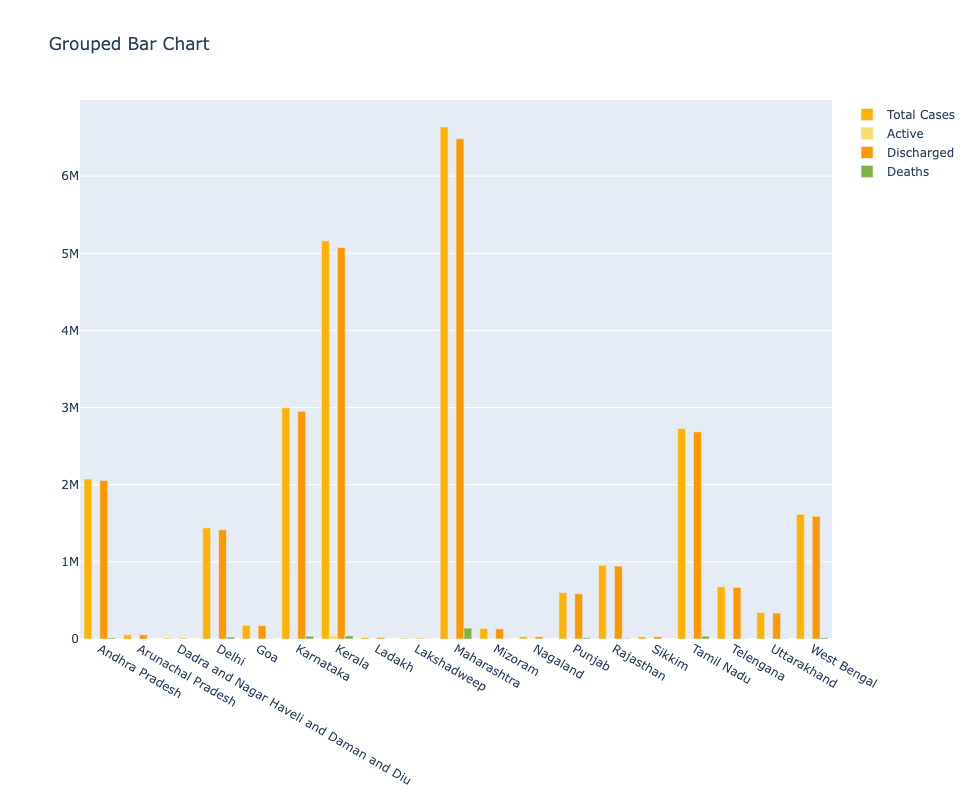

In [48]:
x = dataset7['State/UTs']
y1 = dataset7['Total Cases']
y2 = dataset7['Active']
y3 = dataset7['Discharged']
y4 = dataset7['Deaths']
trace1 = go.Bar(x= x,y= y1,marker={'color' : '#FFB300'},name = 'Total Cases')    
trace2 = go.Bar(x= x,y= y2,marker={'color' : '#F7DC6F'},name = 'Active') 
trace3 = go.Bar(x= x,y= y3,marker={'color' : '#FF9800'},name = 'Discharged')
trace4 = go.Bar(x= x,y= y4,marker={'color' : '#7CB342'},name = 'Deaths')
layout = go.Layout(title= 'Grouped Bar Chart' , width=980,height=800)
data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
fig.show()

# over all visualisation of states

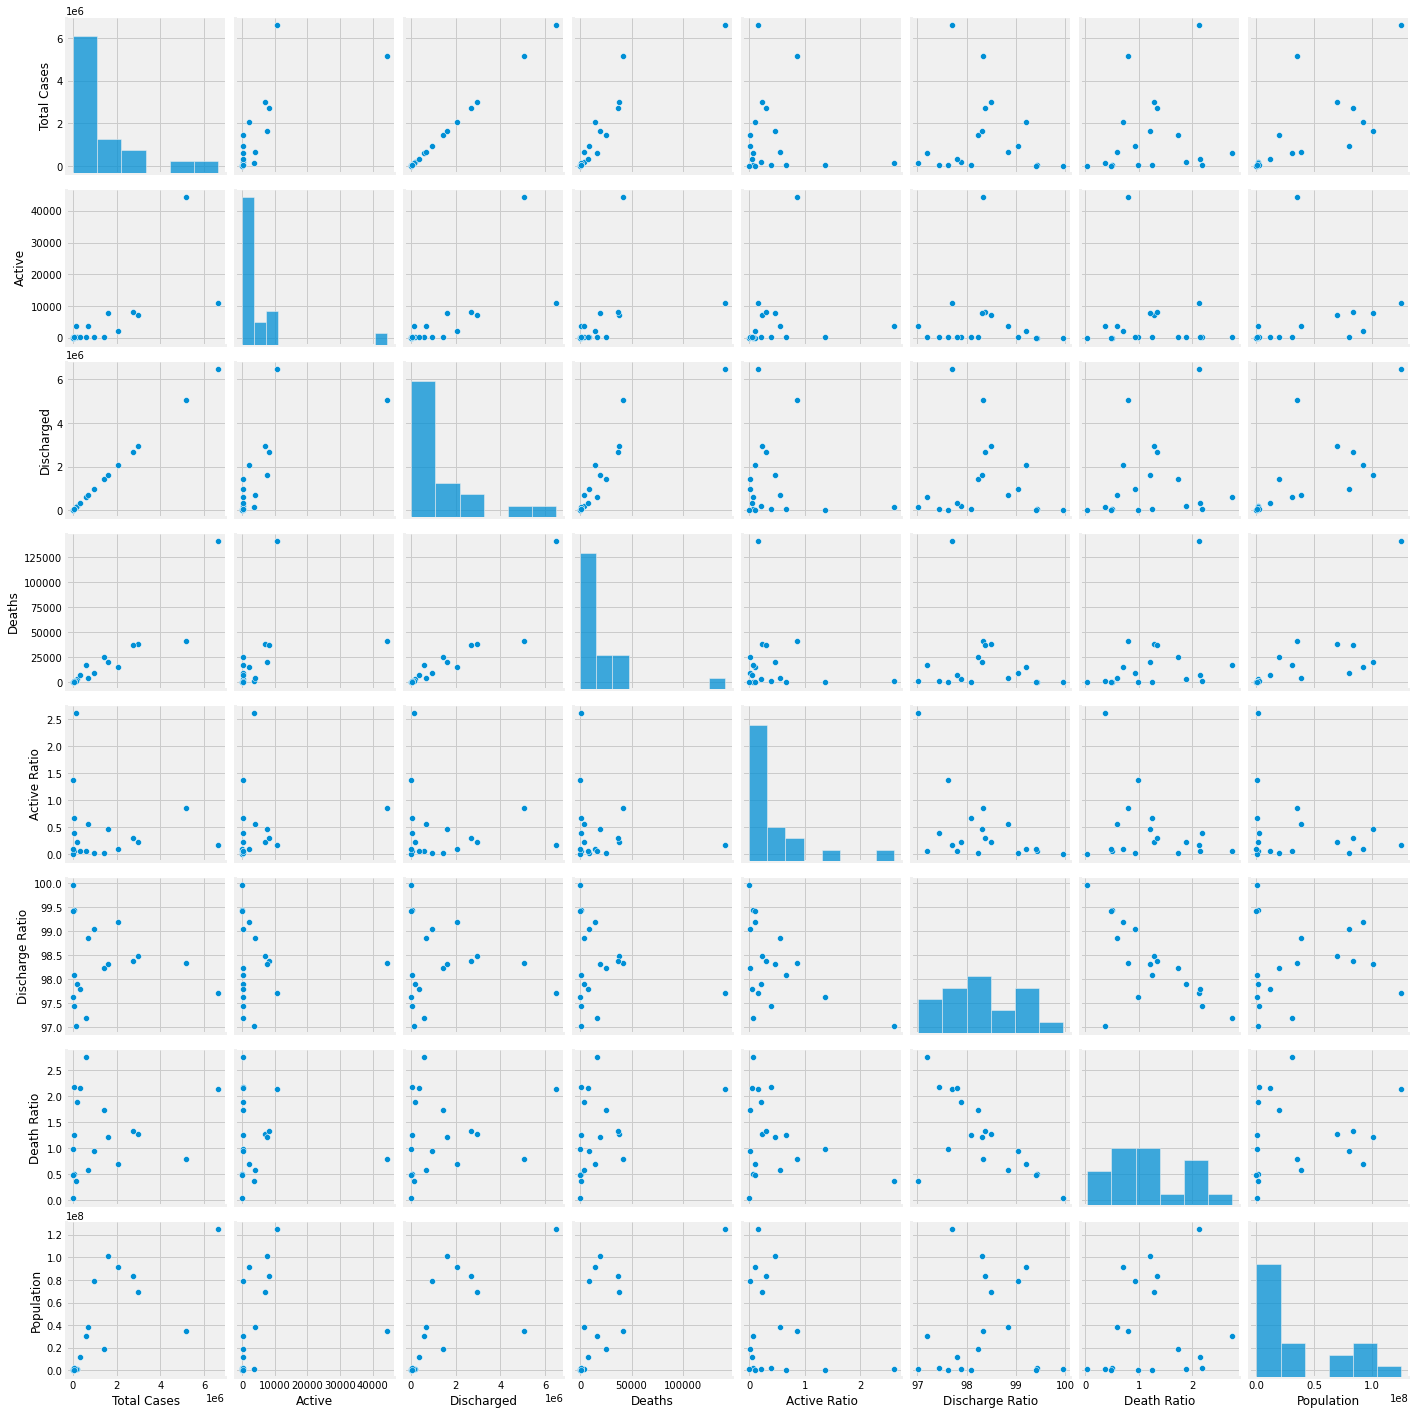

In [49]:
# pairplot of dataframe contating only top 5 or bottom 5 in a column
sns.pairplot(dataset7)

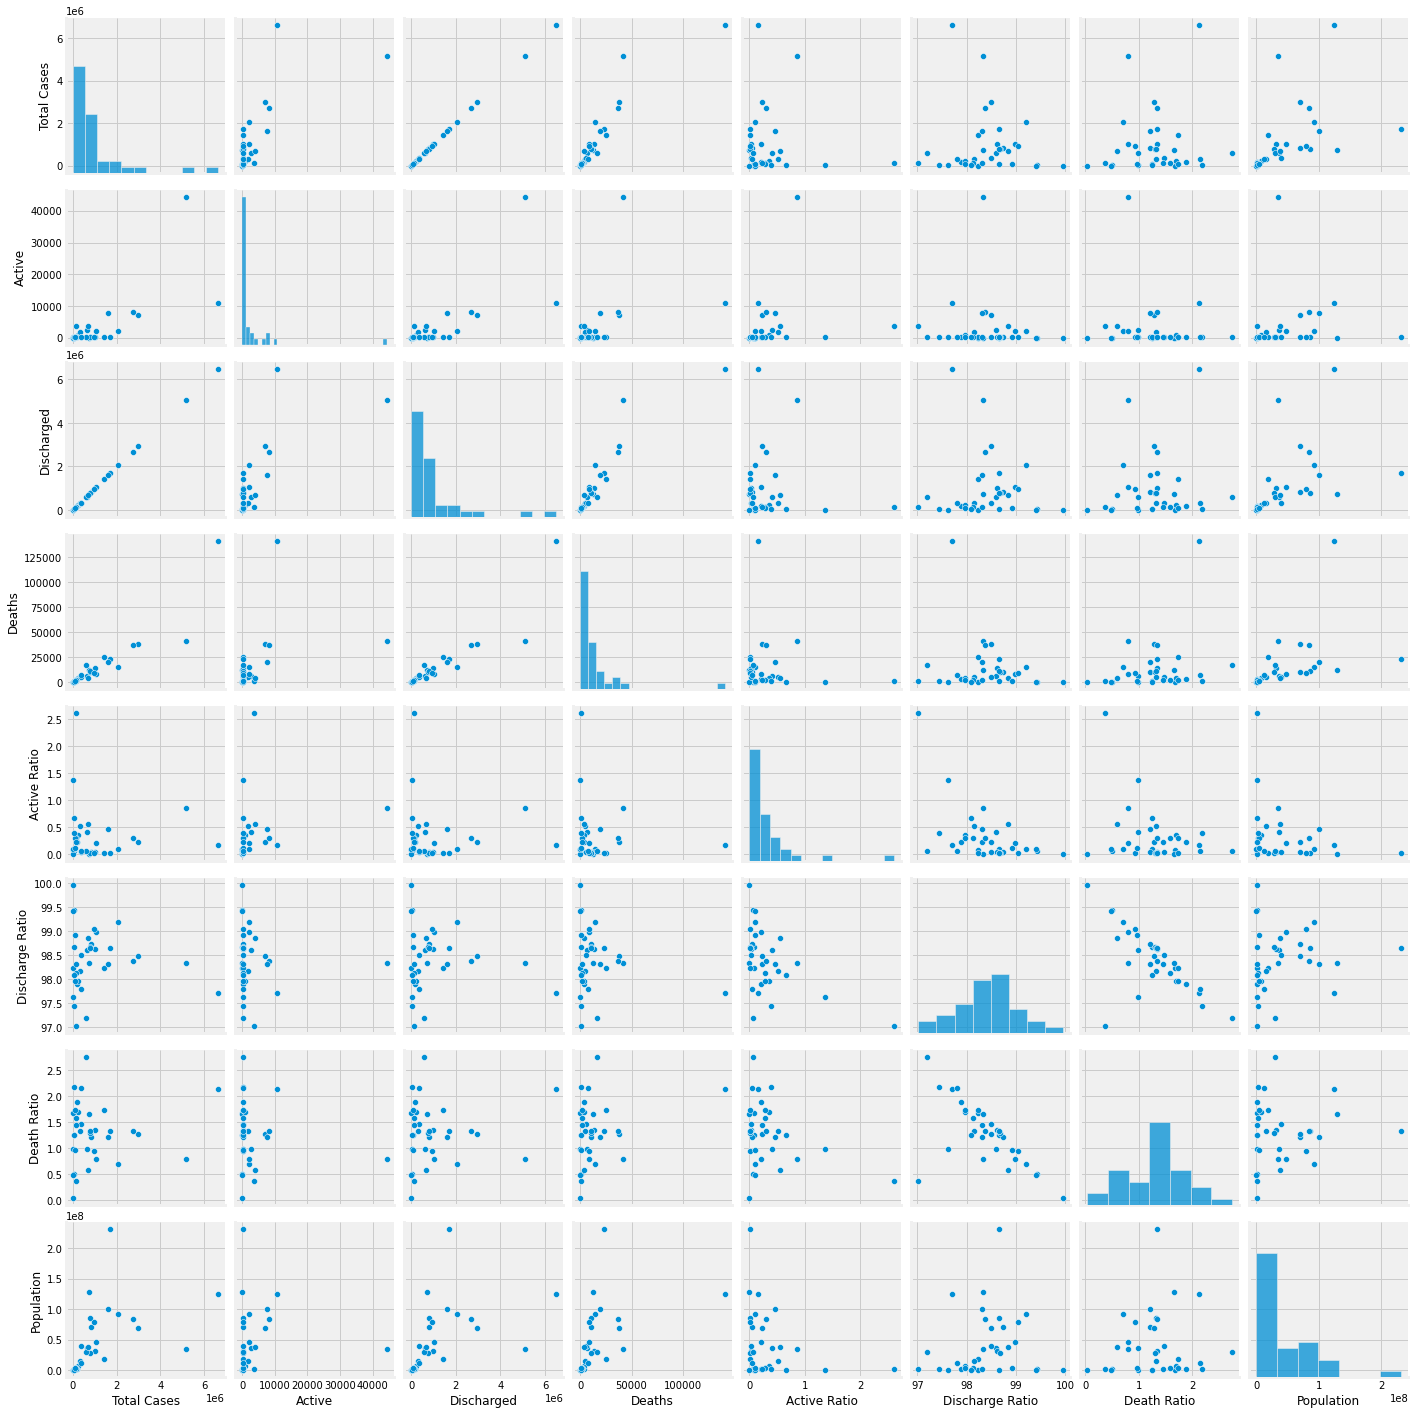

In [50]:
# pairplot of original dataframe
sns.pairplot(dataset)

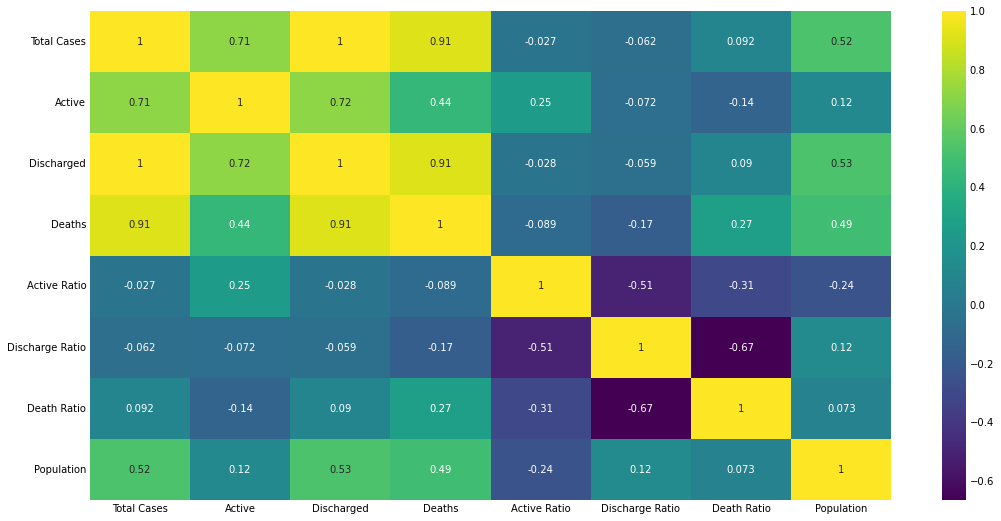

In [51]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(dataset.corr(),annot = True, cmap = 'viridis')
plt.show()

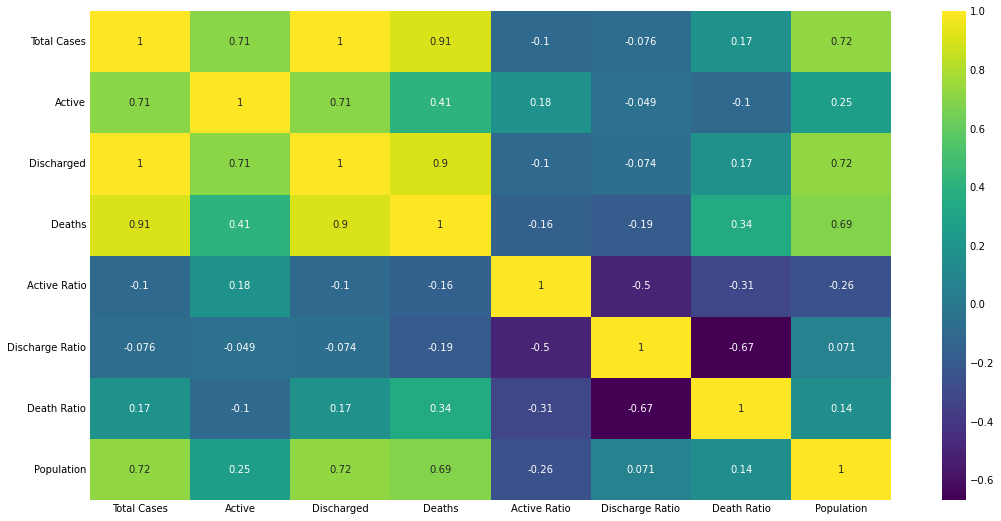

In [52]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(dataset7.corr(),annot = True, cmap = 'viridis')
plt.show()

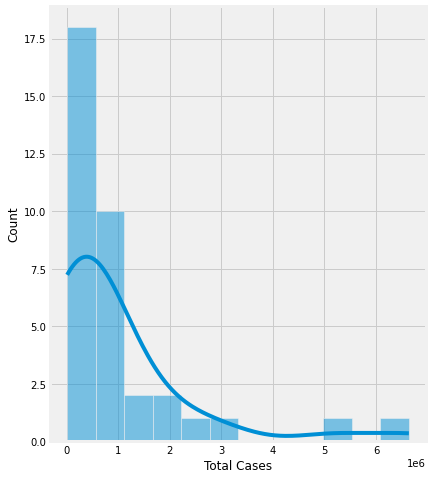

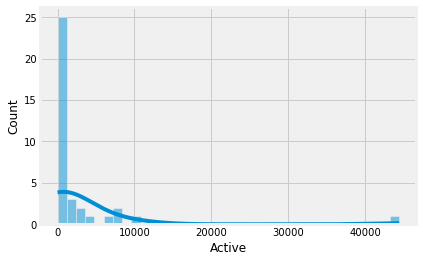

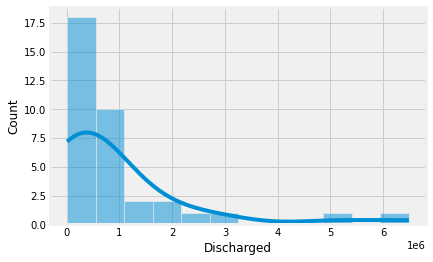

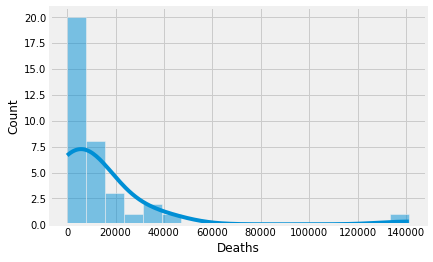

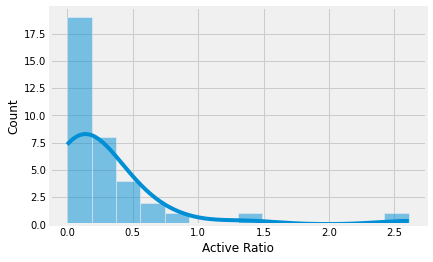

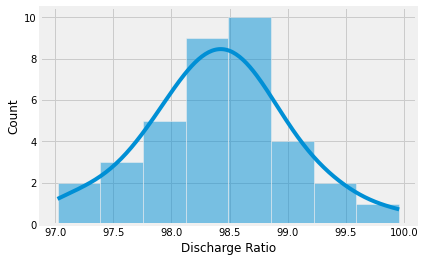

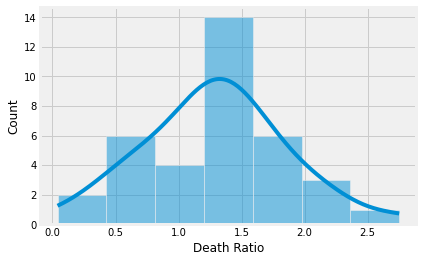

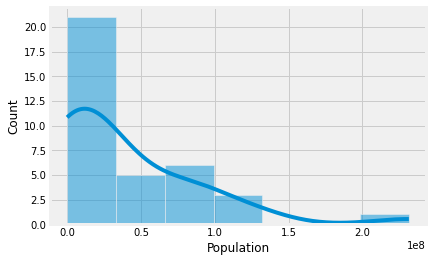

In [53]:
plt.figure(figsize=(6,8))
x = dataset.drop(['State/UTs'],axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True)
    plt.show()

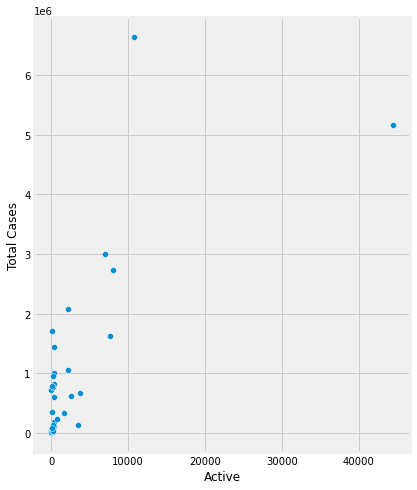

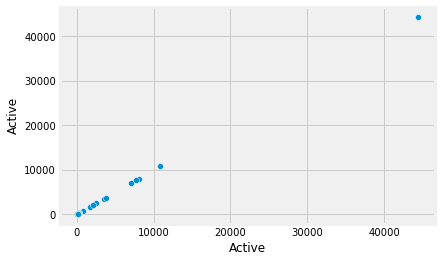

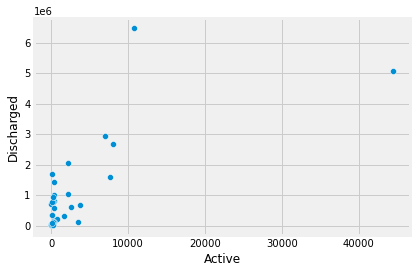

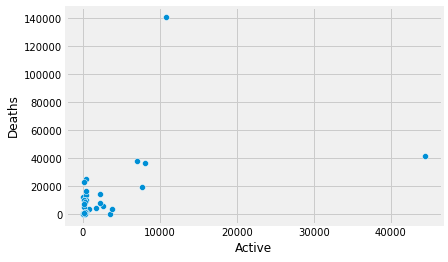

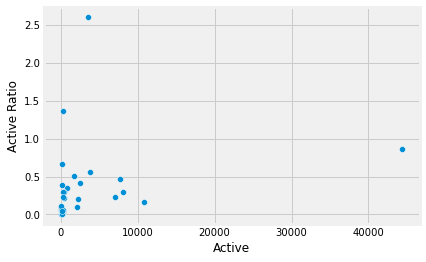

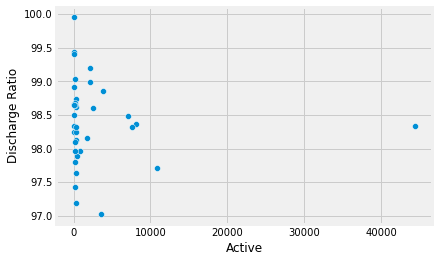

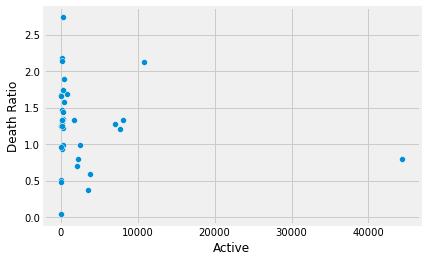

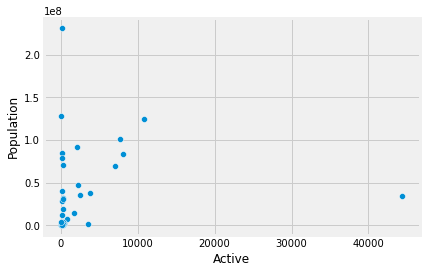

In [54]:
plt.figure(figsize=(6,8))
x = dataset.drop(['State/UTs'],axis = 1)
for i in x.columns:
    sns.scatterplot(x= 'Active',y=x[i],data=dataset)
    plt.show()

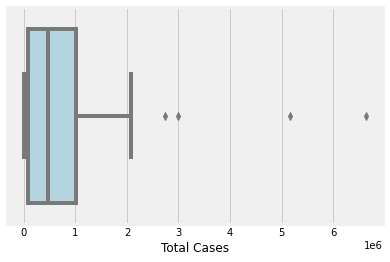

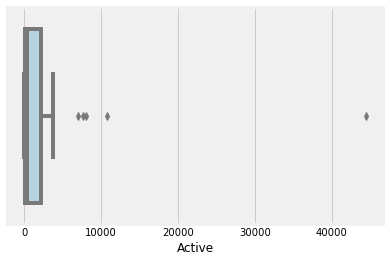

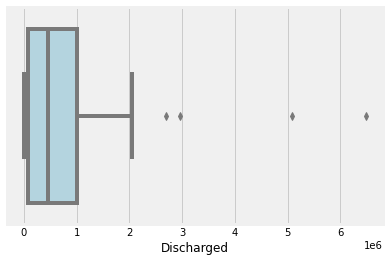

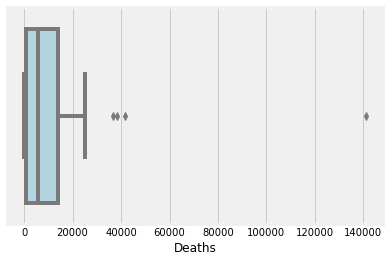

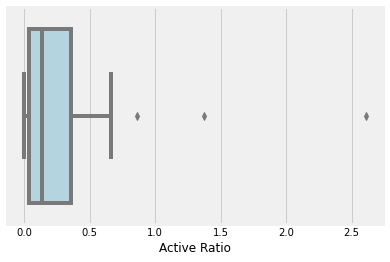

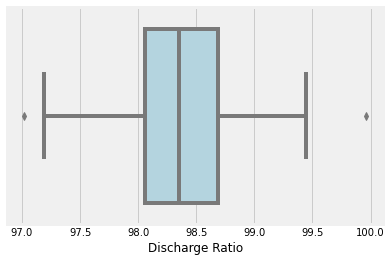

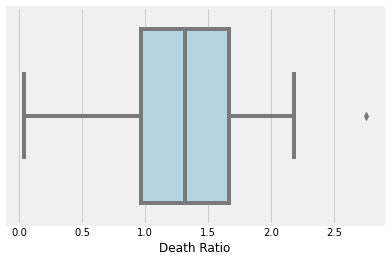

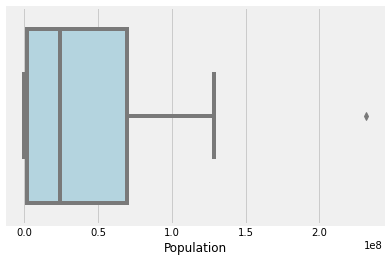

In [55]:
x = dataset.drop('State/UTs',axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'lightblue')   
    plt.xlabel(i)
    plt.show()

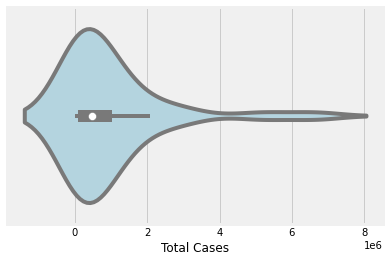

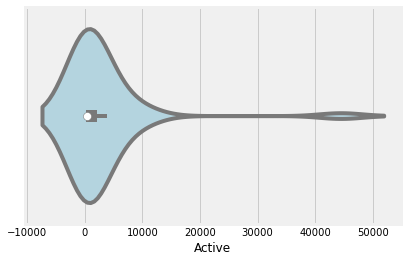

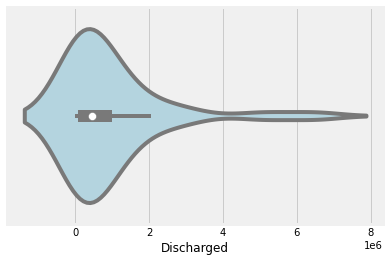

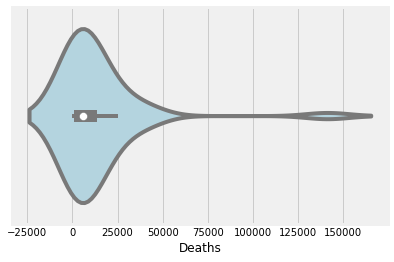

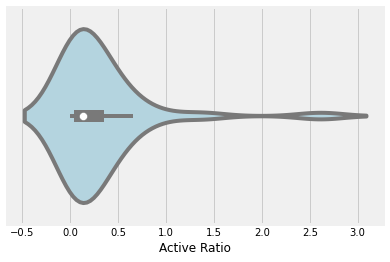

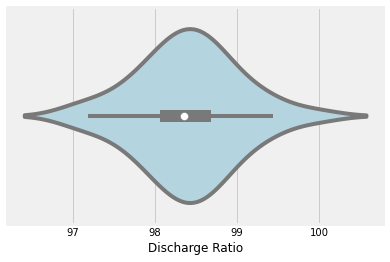

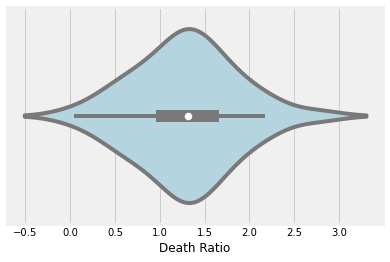

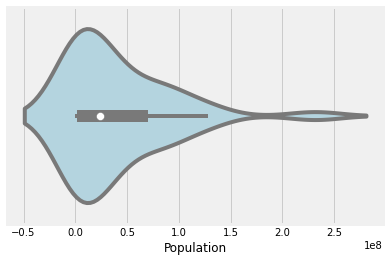

In [56]:
x = dataset.drop('State/UTs',axis = 1)
for i in x.columns:
    sns.violinplot(x = i, data = x,color = 'lightblue')   
    plt.xlabel(i)
    plt.show()

In [57]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x.columns:
    count_outliers(dataset,i)

There are outliers in Total Cases
Count of outliers are: 4
There are outliers in Active
Count of outliers are: 5
There are outliers in Discharged
Count of outliers are: 4
There are outliers in Deaths
Count of outliers are: 4
There are outliers in Active Ratio
Count of outliers are: 3
There are outliers in Discharge Ratio
Count of outliers are: 3
There are outliers in Death Ratio
Count of outliers are: 1
There are outliers in Population
Count of outliers are: 1


In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
c1 = 'State/UTs'
dataset[c1]= label_encoder.fit_transform(dataset[c1]) 
dataset[c1].unique()
dataset

State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
0           0         7688       6        7553     129          0.08   
1           1      2073576    2149     2056979   14448          0.10   
2           2        55288      32       54976     280          0.06   
3           3       617475    2551      608808    6116          0.41   
4           4       726231      22      714119   12090          0.00   
5           5        65481      60       64601     820          0.09   
6           6      1006942     326      993023   13593          0.03   
7           7        10683       0       10679       4          0.00   
8           8      1441295     322     1415875   25098          0.02   
9           9       179125     394      175344    3387          0.22   
10         10       827659     326      817239   10094          0.04   
11         11       771797     180      761563   10054          0.02   
12         12       227483     800      222831    3852          0.35   
13         13       337646    1731      331436    4479          0.51   
14         14       349317     115      344061    5141          0.03   
15         15      2997643    7041     2952378   38224          0.23   
16         16      5161471   44427     5075605   41439          0.86   
17         17        21683     298       21170     215          1.37   
18         18        10404      10       10343      51          0.10   
19         19       793232     142      782562   10528          0.02   
20         20      6638071   10803     6486105  141163          0.16   
21         21       125328     362      122985    1981          0.29   
22         22        84574     246       82853    1475          0.29   
23         23       136362    3555      132302     505          2.61   
24         24        32136     126       31311     699          0.39   
25         25      1050060    2179     1039461    8420          0.21   
26         26       129056     294      126887    1875          0.23   
27         27       603451     347      586496   16608          0.06   
28         28       954874     213      945706    8955          0.02   
29         29        32359     213       31741     405          0.66   
30         30      2729792    8070     2685203   36519          0.30   
31         31       676787    3779      669010    3998          0.56   
32         32        84853      91       83937     825          0.11   
33         33      1710451     116     1687424   22911          0.01   
34         34       344345     173      336761    7411          0.05   
35         35      1618637    7656     1591447   19534          0.47   

    Discharge Ratio  Death Ratio  Population  
0             98.24         1.68      399001  
1             99.20         0.70    91702478  
2             99.44         0.51     1711947  
3             98.60         0.99    35998752  
4             98.33         1.66   128500364  
5             98.66         1.25     1158040  
6             98.62         1.35    32199722  
7             99.96         0.04      773997  
8             98.24         1.74    19301096  
9             97.89         1.89     1521992  
10            98.74         1.22    70400153  
11            98.67         1.30    28900667  
12            97.96         1.69     7503010  
13            98.16         1.33    14999397  
14            98.50         1.47    40100376  
15            98.49         1.28    69599762  
16            98.34         0.80    34698876  
17            97.63         0.99      290492  
18            99.41         0.49       66001  
19            98.65         1.33    85002417  
20            97.71         2.13   124904071  
21            98.13         1.58     3436948  
22            97.97         1.74     3772103  
23            97.02         0.37     1308967  
24            97.43         2.18     2073074  
25            98.99         0.80    47099270  
26            98.32         1.45     1646050  
27            97.19    

In [59]:
X = dataset.drop('Discharge Ratio',axis = 1)
Y = dataset['Discharge Ratio']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [60]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [61]:
reg.coef_

array([ 4.99101724e-05, -7.52644729e-09,  7.34904361e-08,  1.05724091e-08,
       -9.08807851e-08, -1.00051197e+00, -1.00025559e+00, -5.57627677e-11])

In [62]:
pred = reg.predict(X_test)
pred

array([97.63972806, 97.88978263, 98.67972433, 98.36123885, 98.35231891,
       98.6410703 , 97.95970907, 98.09061142, 99.42977253, 98.64700237,
       98.23930534])

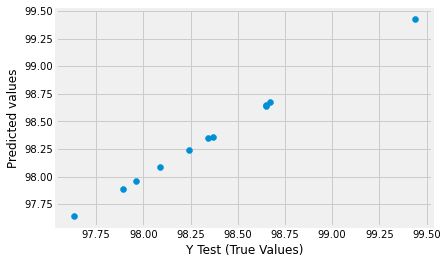

In [63]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [64]:
metrics.explained_variance_score(Y_test,pred)

0.9997483699348304

In [65]:
X = dataset.drop(['State/UTs', 'Death Ratio'],axis=1)
y = dataset['Death Ratio']

In [66]:
data_1 = dataset.copy()
data_1.drop(['Death Ratio'],axis=1,inplace=True)
data_1.drop(['State/UTs'],axis=1,inplace=True)
col_drop = data_1.iloc[:1]
data_1 = data_1.iloc[1:]
Deaths = col_drop.Deaths
col_drop.drop('Deaths',axis=1,inplace=True)

In [67]:
data_1.describe()


Total Cases        Active    Discharged         Deaths  Active Ratio  \
count  3.500000e+01     35.000000  3.500000e+01      35.000000     35.000000   
mean   9.893019e+05   2832.828571  9.729492e+05   13519.914286      0.310857   
std    1.455142e+06   7727.953391  1.426946e+06   24882.805669      0.492785   
min    1.040400e+04      0.000000  1.034300e+04       4.000000      0.000000   
25%    1.050905e+05    134.000000  1.034610e+05    1150.000000      0.035000   
50%    6.034510e+05    322.000000  5.864960e+05    6116.000000      0.160000   
75%    1.028501e+06   2164.000000  1.016242e+06   14020.500000      0.370000   
max    6.638071e+06  44427.000000  6.486105e+06  141163.000000      2.610000   

       Discharge Ratio    Population  
count        35.000000  3.500000e+01  
mean         98.408286  4.084203e+07  
std           0.631117  5.078815e+07  
min          97.020000  6.600100e+04  
25%          98.030000  1.892510e+06  
50%          98.370000  2.890067e+07  
75%          98.705000  6.999996e+07  
max          99.960000  2.315026e+08

In [68]:
from sklearn.linear_model import HuberRegressor
y_train = data_1.Deaths
data_1.drop(['Deaths'],axis=1,inplace=True)
hub = HuberRegressor(alpha=0.001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
hub.fit(data_1,y_train)
pred = hub.predict(col_drop)

In [69]:
print(f'Predicted Deaths: {int(pred[0])}')
print(f'Actual Casuality caused: {Deaths.values[0]}')


Predicted Deaths: 129
Actual Casuality caused: 129


In [70]:
dataset.describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

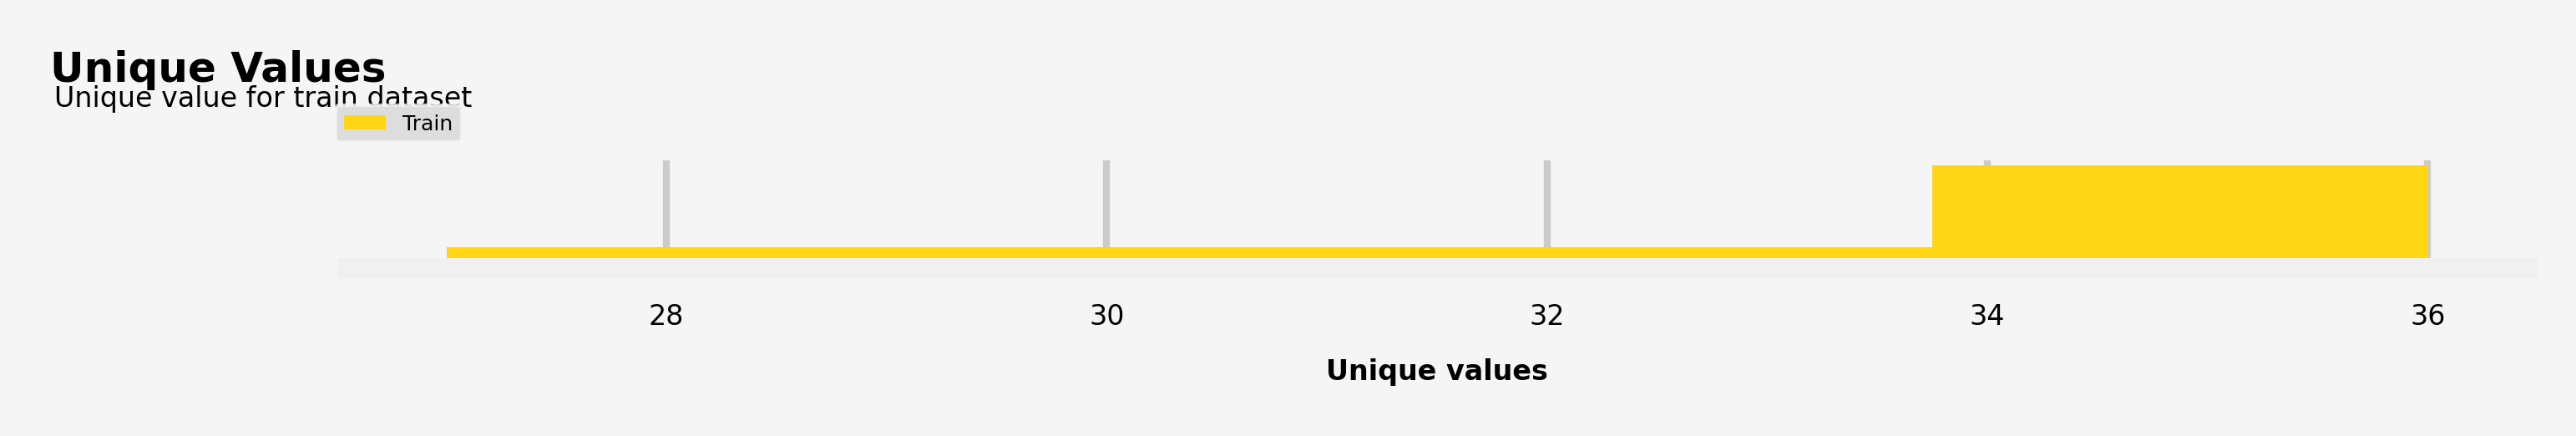

In [71]:
features = [feature for feature in dataset.columns if feature not in ['id','State/UTs']]

unique_values_train = np.zeros(2)
for feature in features:
    temp = dataset[feature].unique()
    unique_values_train = np.concatenate([unique_values_train, temp])
unique_values_train = np.unique(unique_values_train)

unique_value_feature_train = pd.DataFrame(dataset[features].nunique())
unique_value_feature_train = unique_value_feature_train.reset_index(drop=False)
unique_value_feature_train.columns = ['Features', 'Count']
####################################################################################
####################################################################################
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514'])

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top", "left"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0_sns = sns.histplot(ax=ax0, x=unique_value_feature_train['Count'], zorder=2, linewidth=0, alpha=1)
ax0_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.get_yaxis().set_visible(False)

ax0.text(25.2, 10.6, 'Unique Values', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(25.22, 8.9, 'Unique value for train dataset', fontsize=4, ha='left', va='top')
ax0_sns.legend(['Train', 'Test'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.6), loc='upper left')

plt.show()

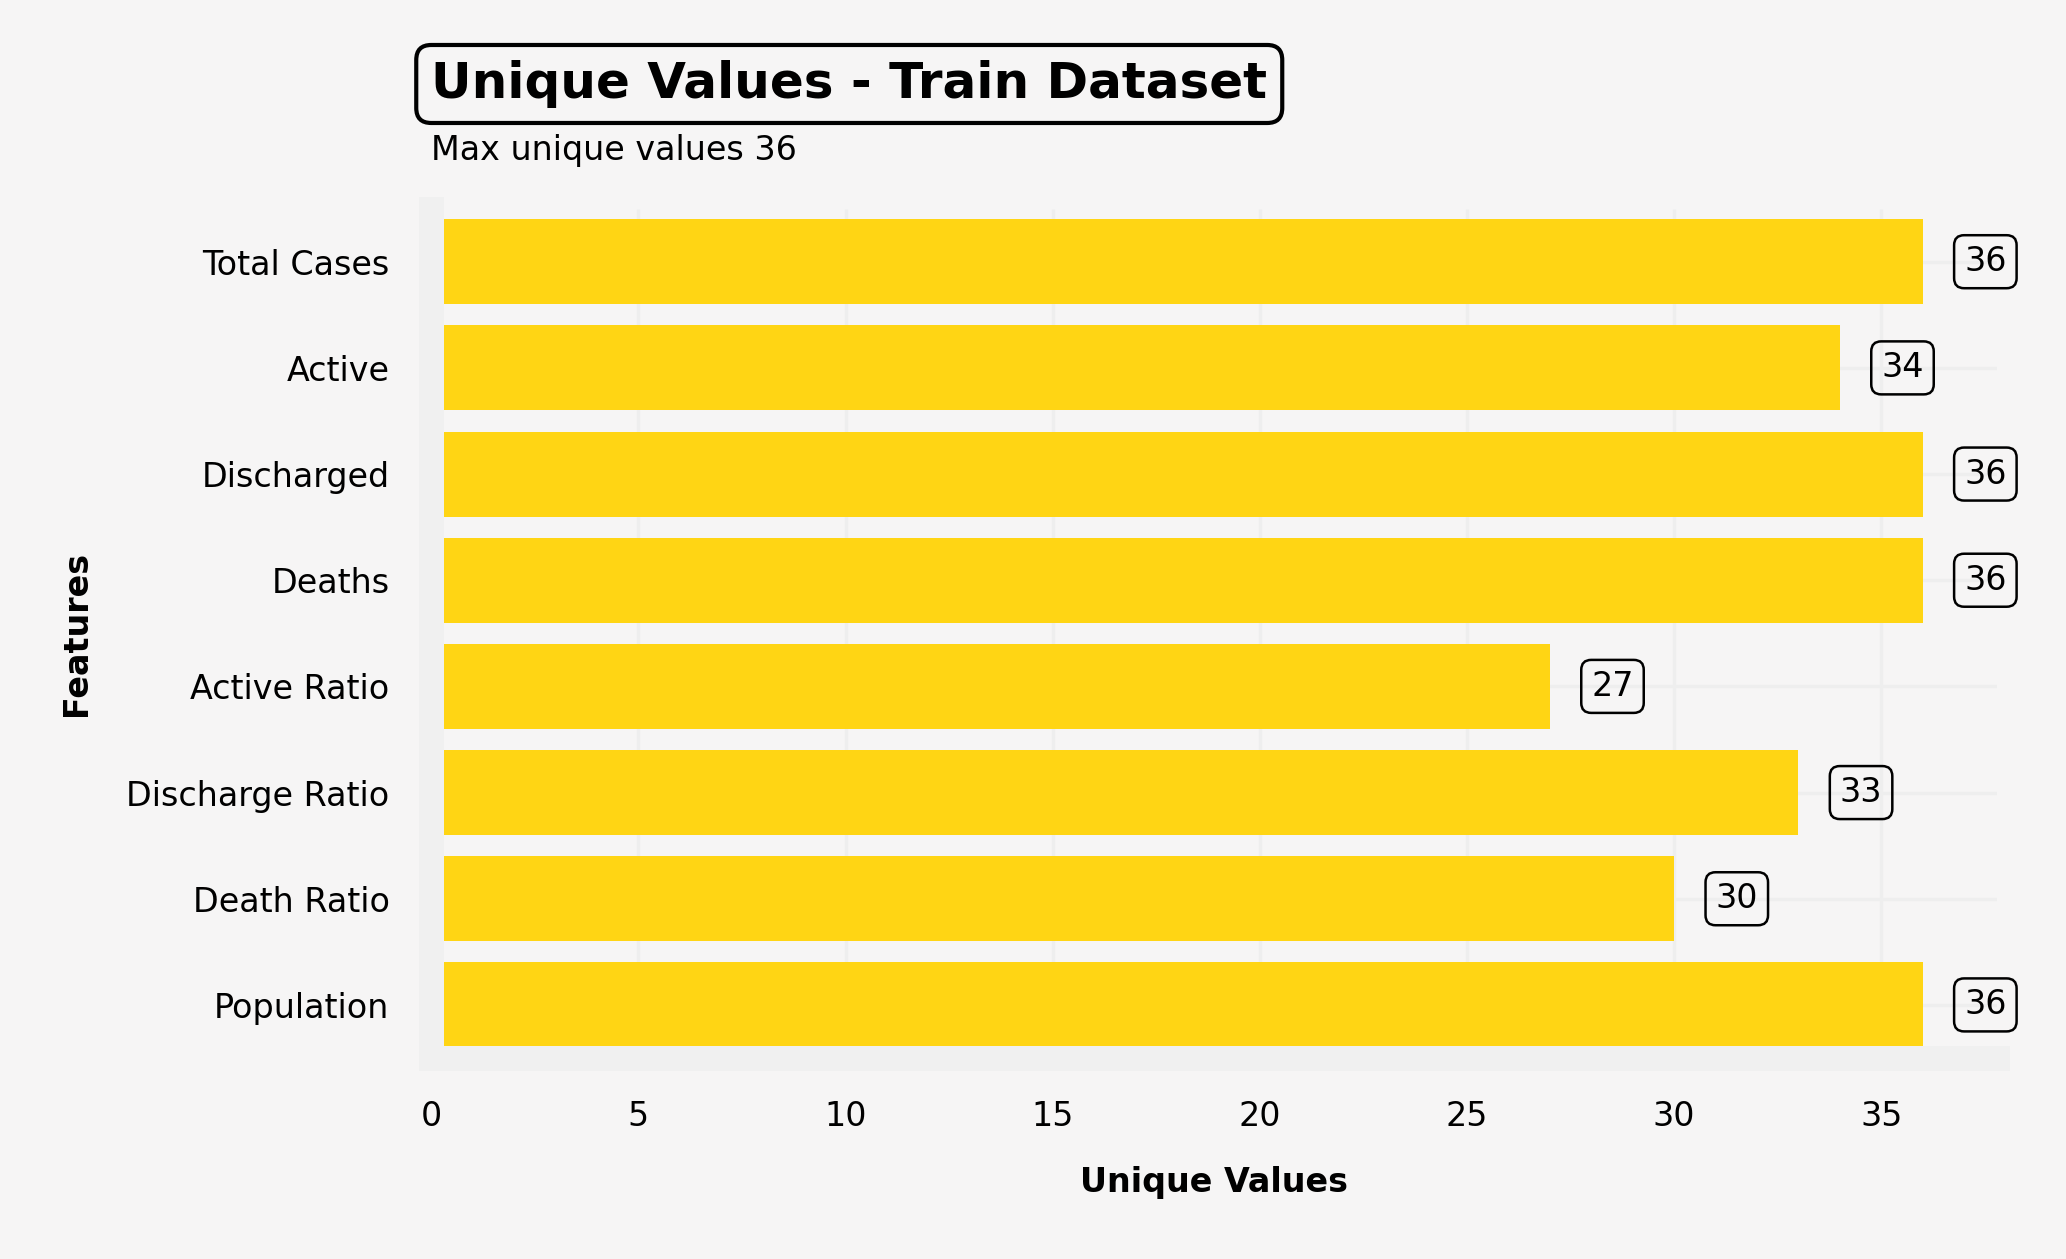

In [72]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*75)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_value_feature_train['Features'], x=unique_value_feature_train['Count'],
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax0.text(0, -1.2, 'Max unique values 36', fontsize=4, ha='left', va='top')
# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax0.set_anchor('C')  

plt.show()


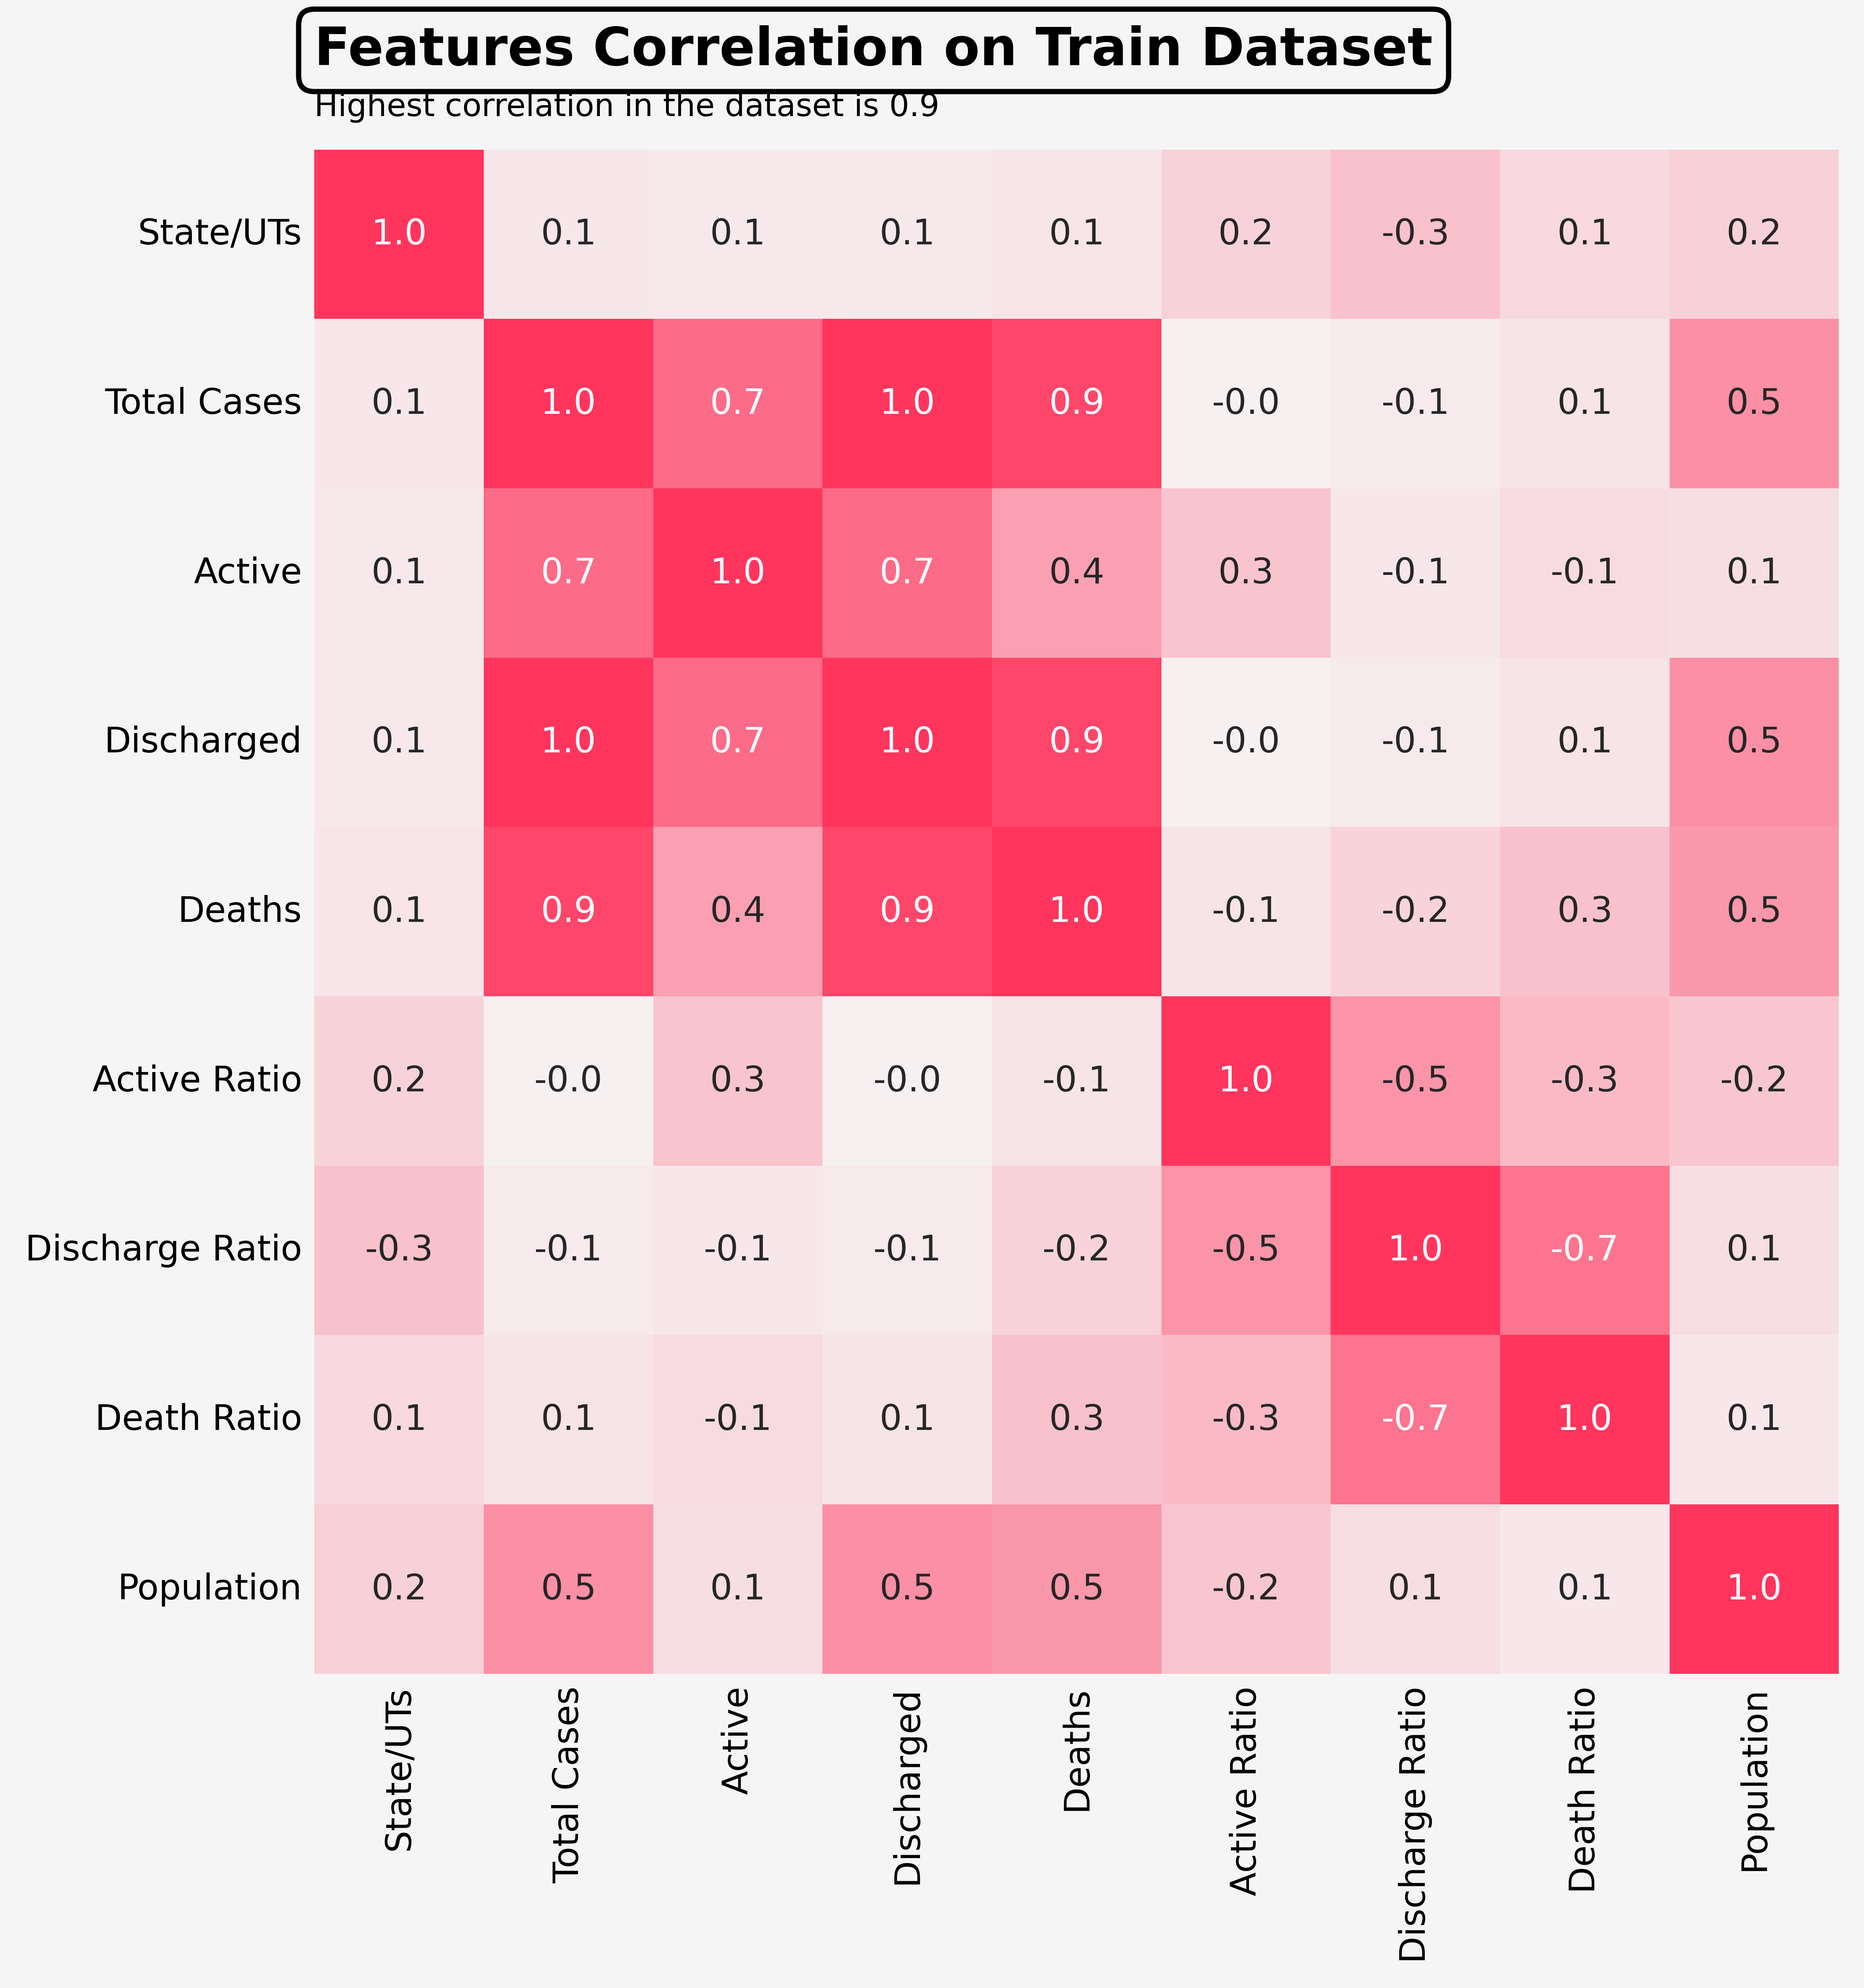

In [73]:
background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -0.5, 'Features Correlation on Train Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.2, 'Highest correlation in the dataset is 0.9', fontsize=9, fontweight='light')

sns.heatmap(dataset.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')
plt.show()
